# ML Assignment 1

Data set 1 - Bank Account Fraud Dataset \
https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022 \
Data set 2 - Customer Segmentation \
https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation?select=train.csv


# Load function and data

In [1]:
%run ./ML_assignment1_Functions.ipynb

In [2]:
# !pip install openpyxl

# Data set 1

In [3]:
# load data
df = load_data('Base.csv')

## model1.1 - Decision tree with original data

In [4]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# drop catcols
X_train, X_valid, X_test = drop_catcols(X_train, X_valid, X_test)
# model
params = {'max_leaf_nodes': 10,
             'max_depth': 10}
clf = tree.DecisionTreeClassifier(random_state = 0, max_leaf_nodes=params['max_leaf_nodes'], max_depth=params['max_depth'])
ori_perf = model(clf, X_train, y_train, X_valid, y_valid)
ori_perf['max_leaf_nodes'] = params['max_leaf_nodes']
ori_perf['max_depth'] = params['max_depth']
ori_perf['name'] = 'dt_Ori_data'
ori_perf

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.73     0.757       0.63     0.575          0.73     0.684   0.01562   

   max_leaf_nodes  max_depth         name  
0              10         10  dt_Ori_data

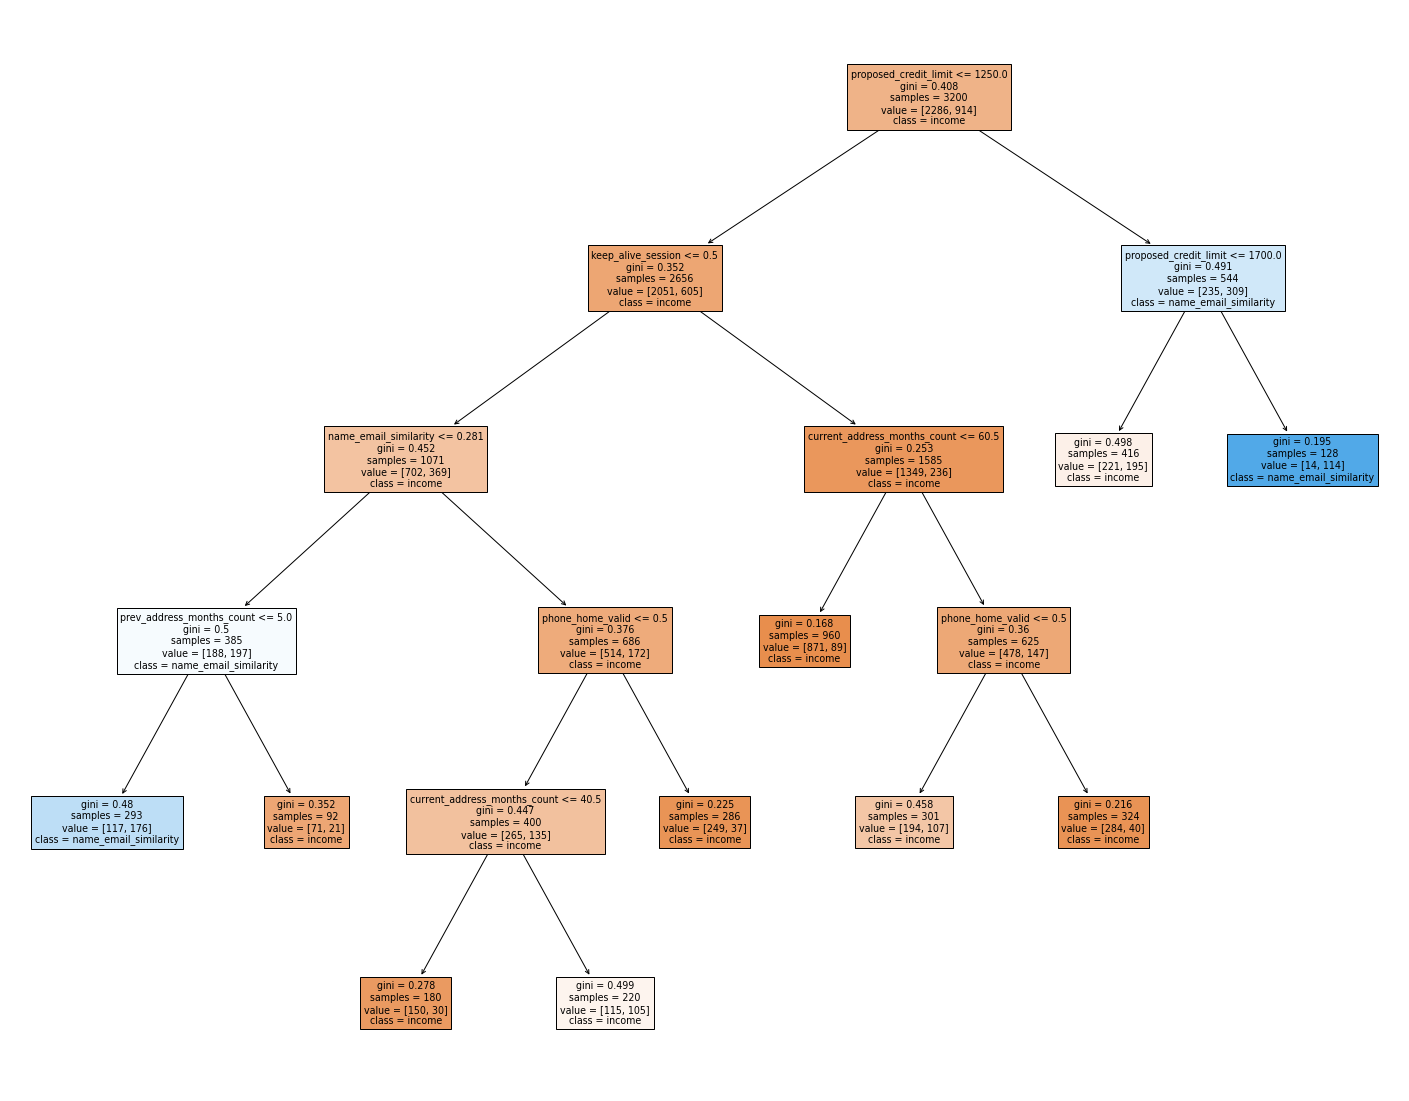

In [5]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names=X_train.columns,
                   filled=True)

## model1.2 - Decision tree with feature engineering

In [6]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
params = {'max_leaf_nodes': 10,
             'max_depth': 10
            }
clf = tree.DecisionTreeClassifier(random_state = 0,max_leaf_nodes=params['max_leaf_nodes'], max_depth=params['max_depth'])
fe_perf = model(clf, X_train, y_train, X_valid, y_valid)
fe_perf['max_leaf_nodes'] = params['max_leaf_nodes']
fe_perf['max_depth'] = params['max_depth']
fe_perf['name'] = 'dt_Feature_engineering'
fe_perf
# tree_graph(clf, X_train, y_train)

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.759     0.825      0.841     0.786         0.759      0.77       0.0   

   max_leaf_nodes  max_depth                    name  
0              10         10  dt_Feature_engineering

## model1.3 - Decision tree tune pruning

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.612     0.758      0.759     0.729         0.612     0.619   0.01562   
0  0.612     0.758      0.759     0.729         0.612     0.619   0.00000   
0  0.612     0.758      0.759     0.729         0.612     0.619   0.00000   
0  0.612     0.758      0.759     0.729         0.612     0.619   0.00000   
0  0.612     0.758      0.759     0.729         0.612     0.619   0.00000   
0  0.815     0.776      0.776     0.751         0.815     0.810   0.00000   
0  0.759     0.825      0.841     0.786         0.759     0.770   0.01562   
0  0.759     0.825      0.841     0.786         0.759     0.770   0.01562   
0  0.759     0.825      0.841     0.786         0.759     0.770   0.00000   
0  0.759     0.825      0.841     0.786         0.759     0.770   0.00000   
0  0.815     0.776      0.776     0.751         0.815     0.810   0.00000   
0  0.782     0.832      0.855     0.796         0.782     0.791   0.01562   
0  0.782     0.832      0.855     0.796         0.782     0.791   0.01562   
0  0.782     0.832      0.855     0.796         0.782     0.791   0.00000   
0  0.782     0.832      0.855     0.796         0.782     0.791   0.00000   
0  0.815     0.776      0.776     0.751         0.815     0.810   0.00000   
0  0.781     0.838      0.871     0.794         0.781     0.790   0.00000   
0  0.782     0.841      0.871     0.798         0.782     0.792   0.01562   
0  0.782     0.841      0.871     0.798         0.782     0.792   0.01562   
0  0.782     0.841      0.871     0.798         0.782     0.792   0.03125   
0  0.815     0.776      0.776     0.751         0.815     0.810   0.01562   
0  0.761     0.845      0.885     0.784         0.761     0.772   0.01562   
0  0.764     0.852      0.885     0.789         0.764     0.774   0.03125   
0  0.764     0.852      0.885     0.789         0.764     0.774   0.03125   
0  0.764     0.852      0.885     0.789         0.764     0.774   0.00000   

   max_leaf_nodes  max_depth     name  
0               2          2  dt_tune  
0               2         10  dt_tune  
0               2         20  dt_tune  
0               2         35  dt_tune  
0               2         50  dt_tune  
0              10          2  dt_tune  
0              10         10  dt_tune  
0              10         20  dt_tune  
0              10         35  dt_tune  
0              10         50  dt_tune  
0              20          2  dt_tune  
0              20         10  dt_tune  
0              20         20  dt_tune  
0              20         35  dt_tune  
0              20         50  dt_tune  
0              35          2  dt_tune  
0              35         10  dt_tune  
0              35         20  dt_tune  
0              35         35  dt_tune  
0              35         50  dt_tune  
0              50          2  dt_tune  
0              50         10  dt_tune  
0              50         20  dt_tune  
0              50         35  dt_tune  
0              50         50  dt_tune

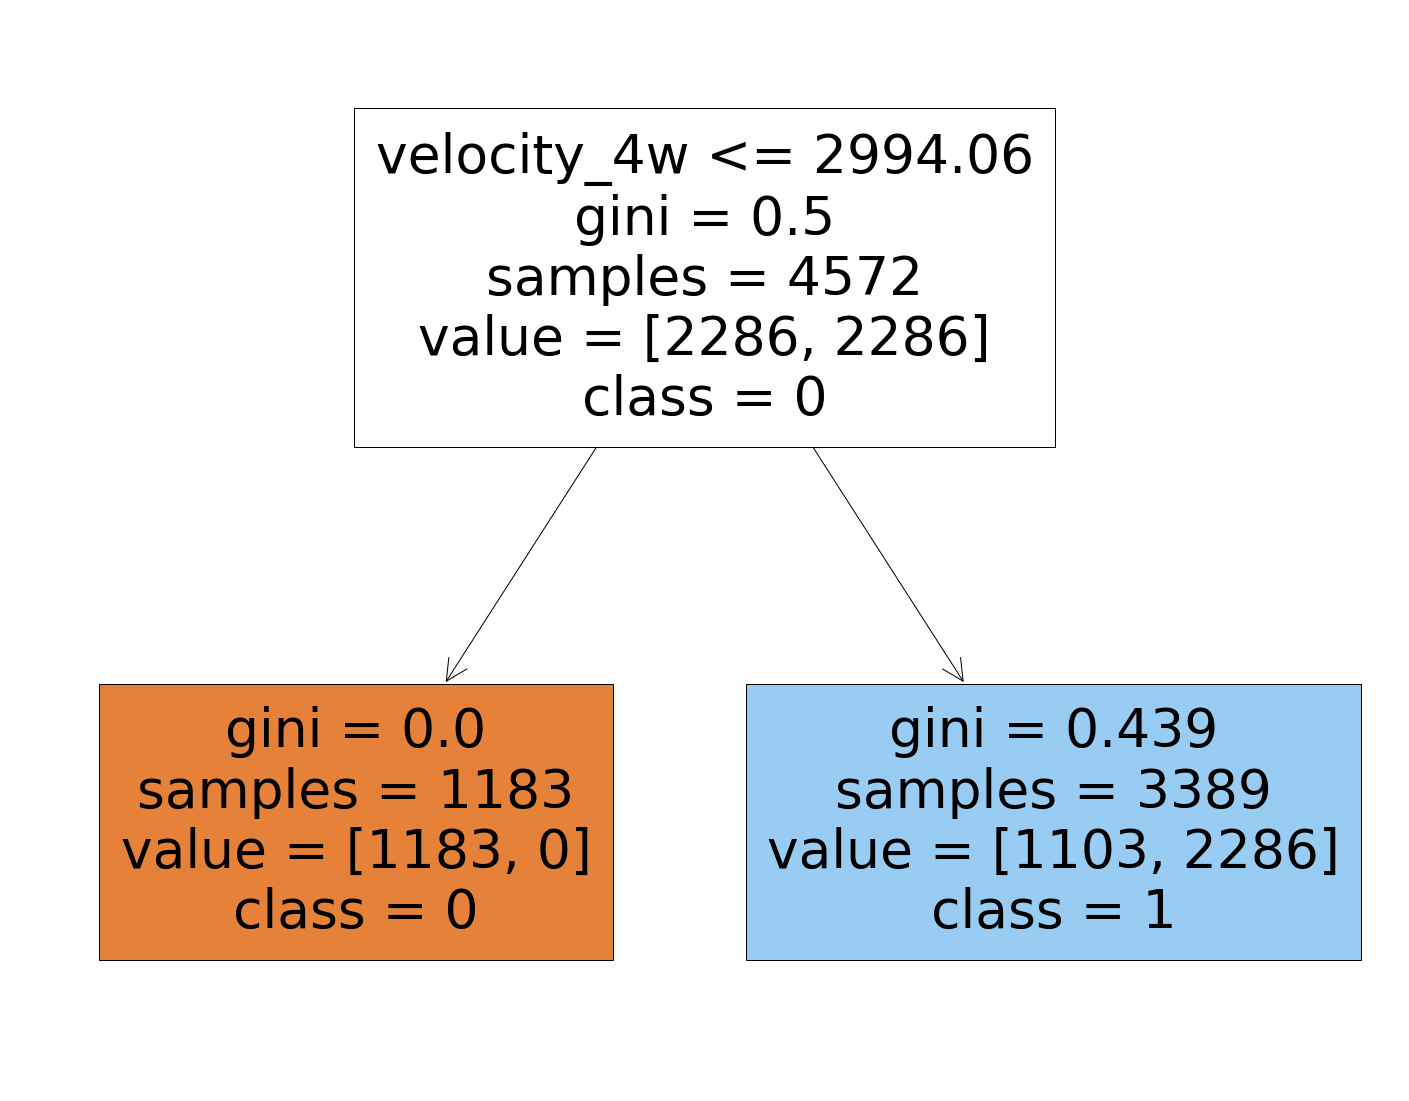

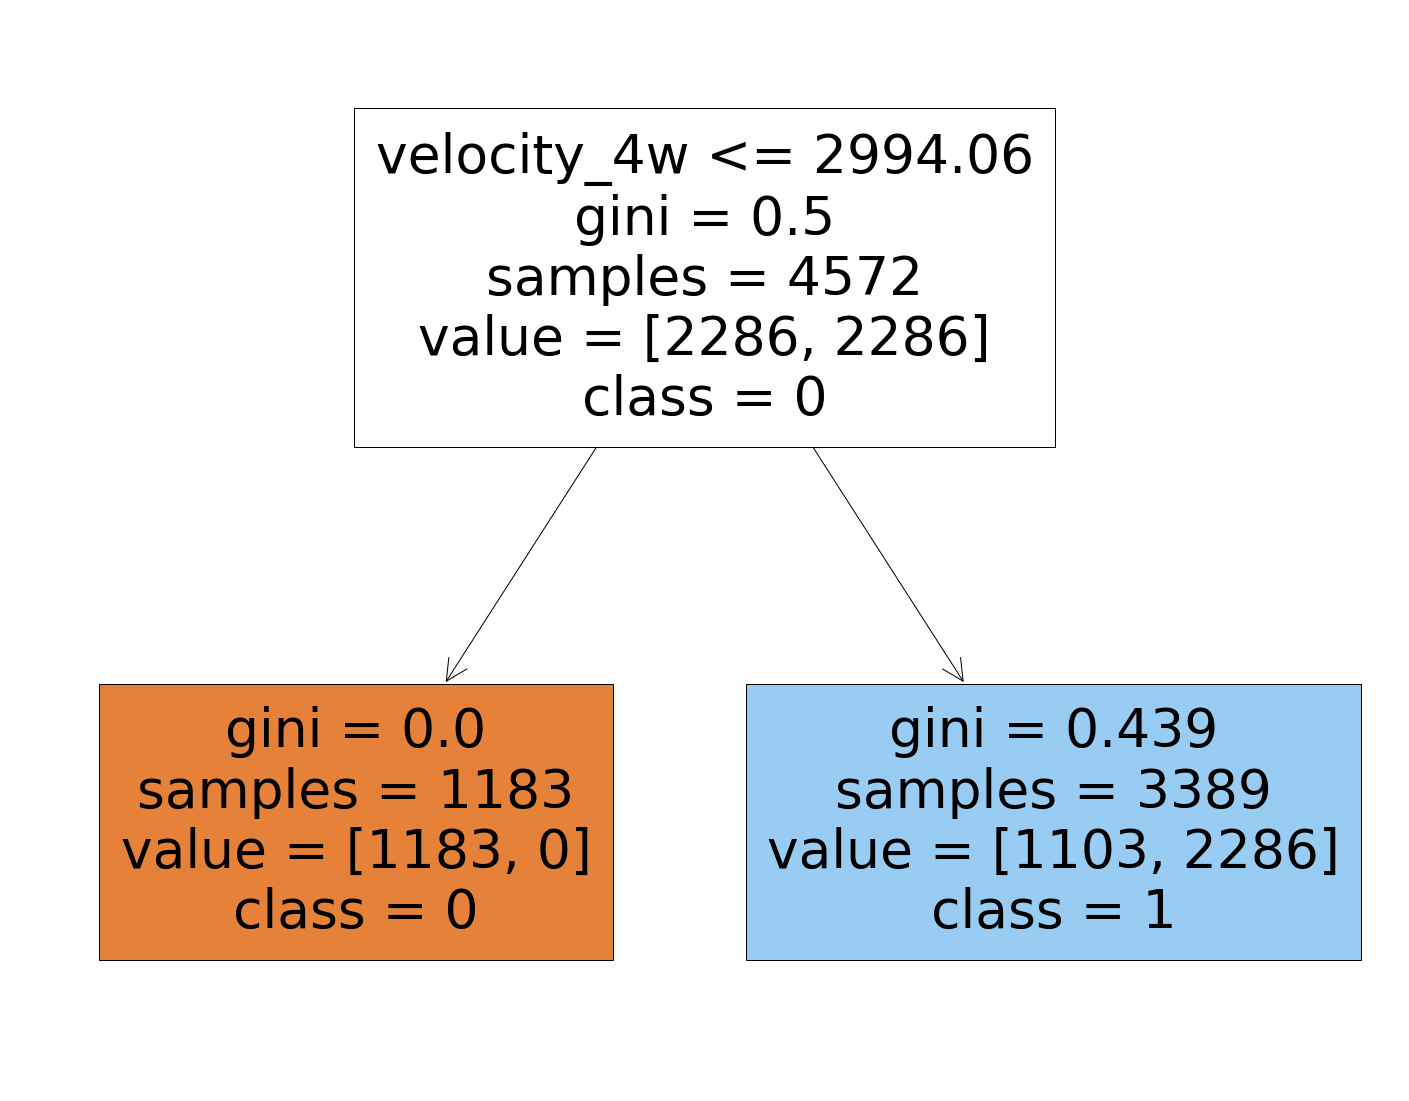

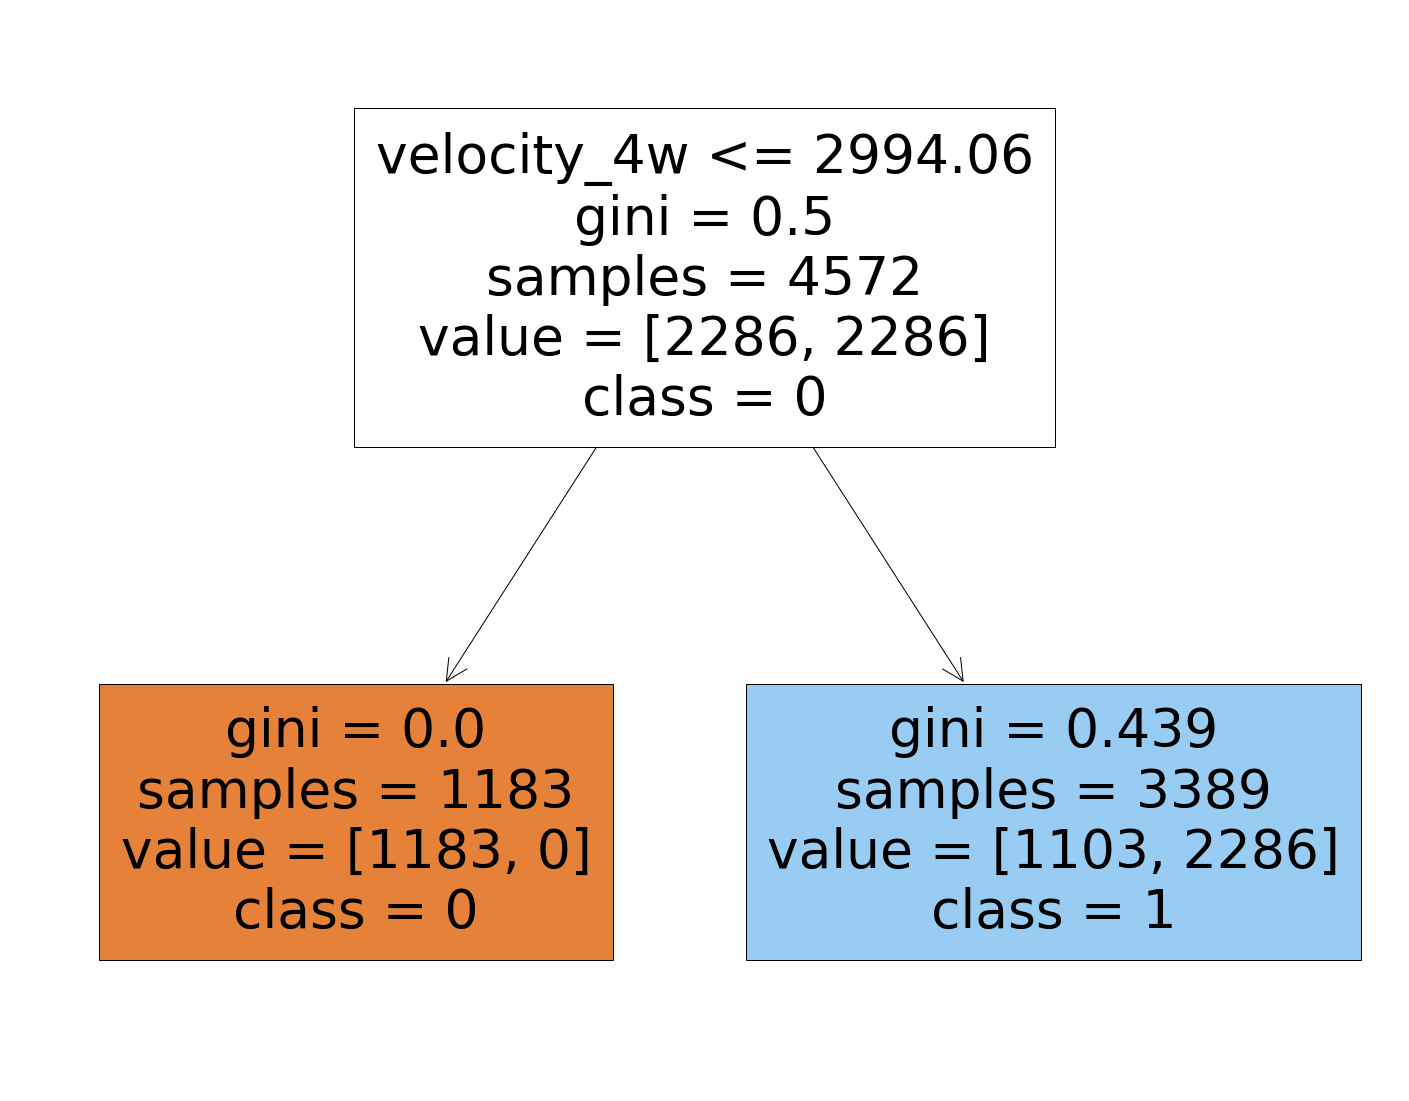

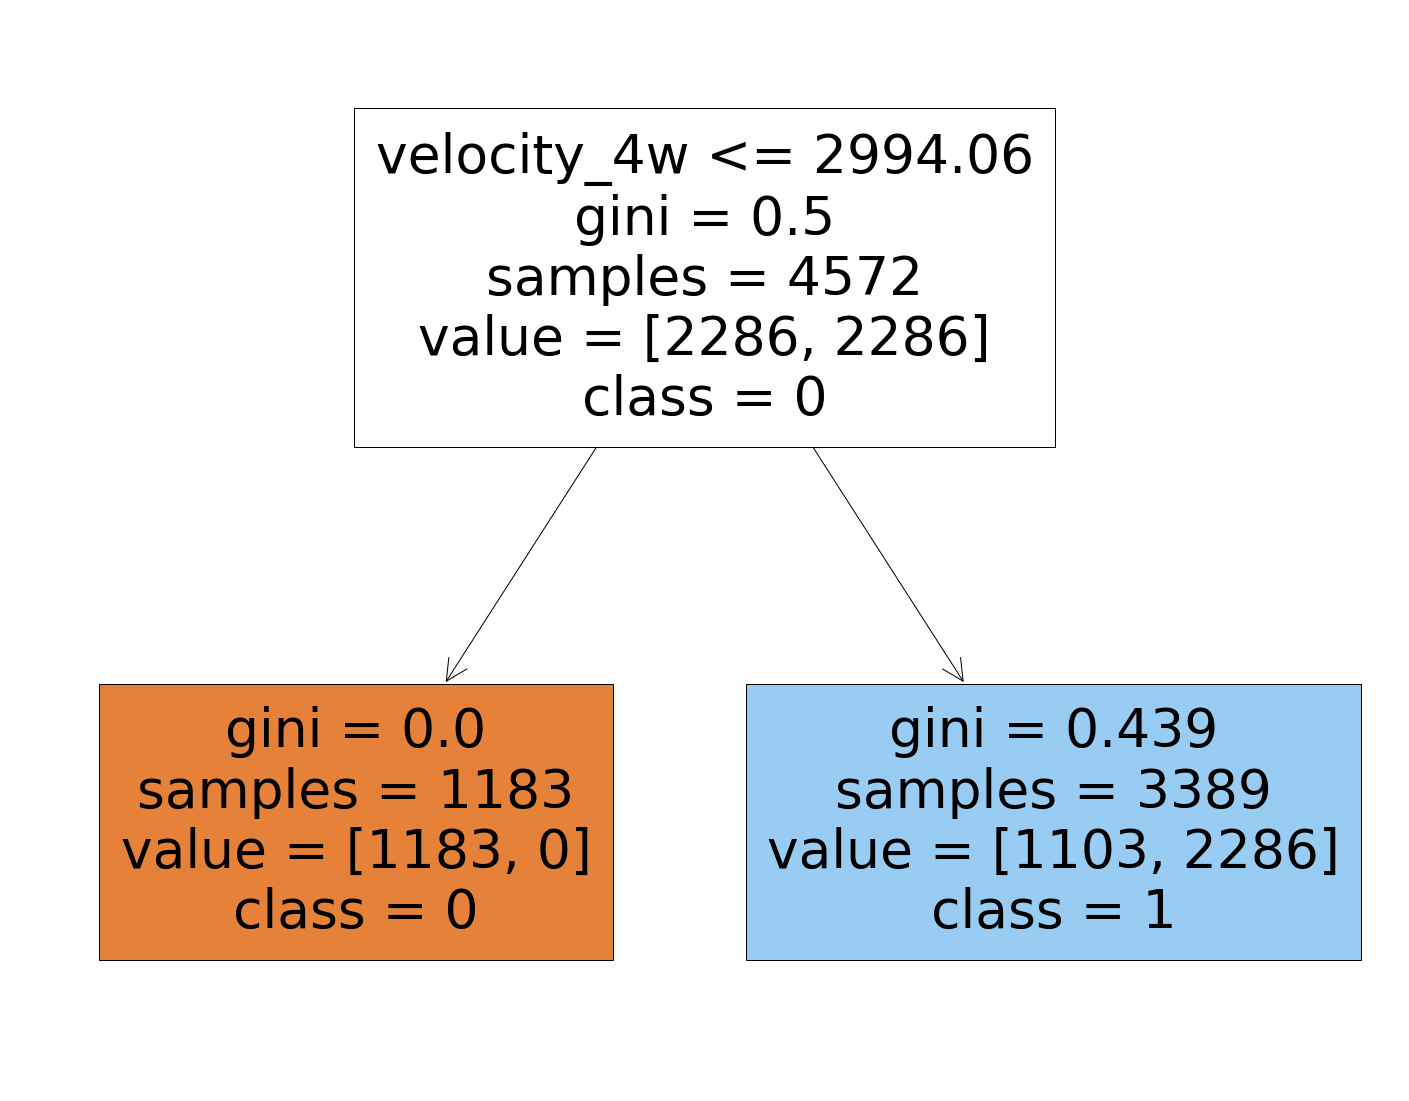

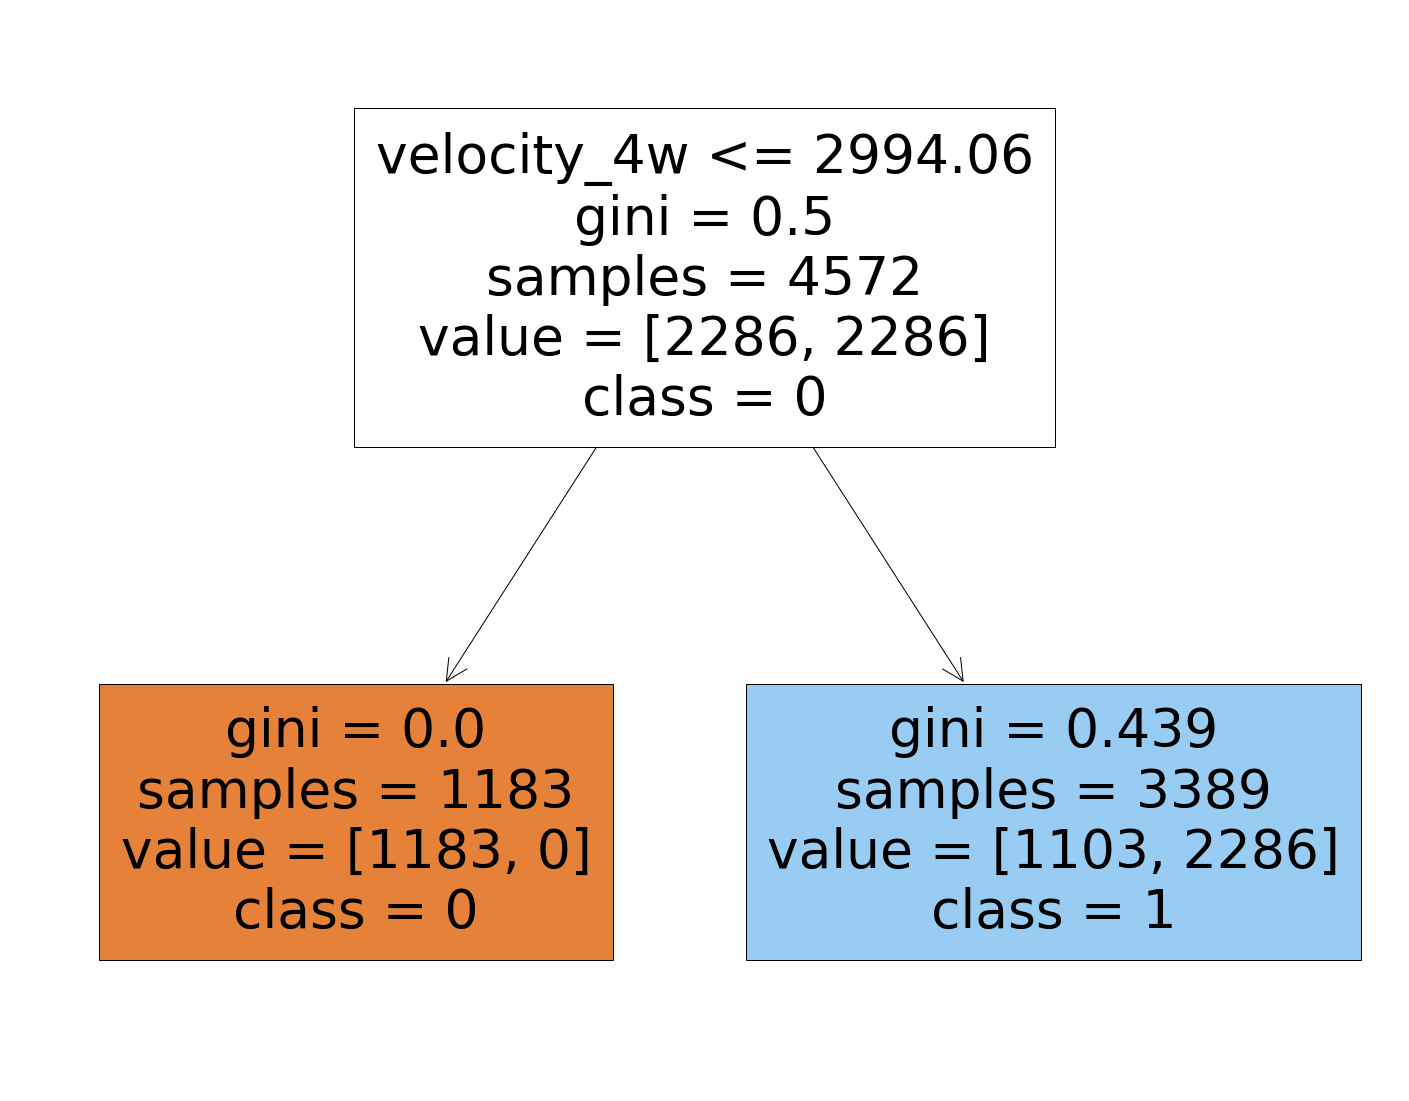

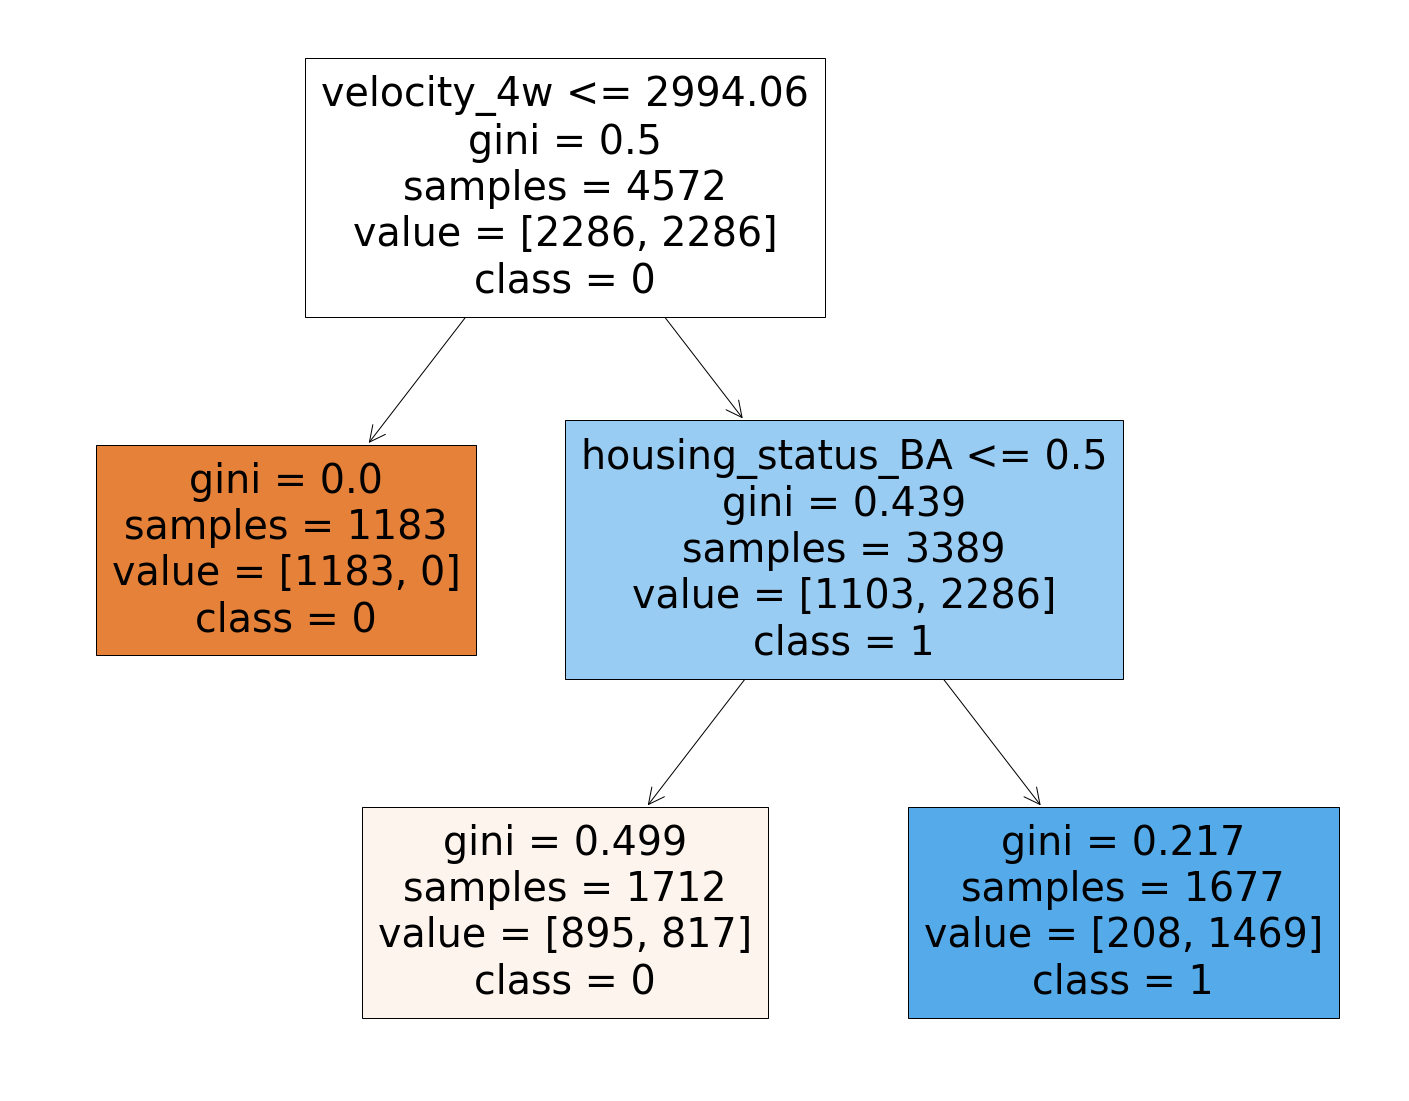

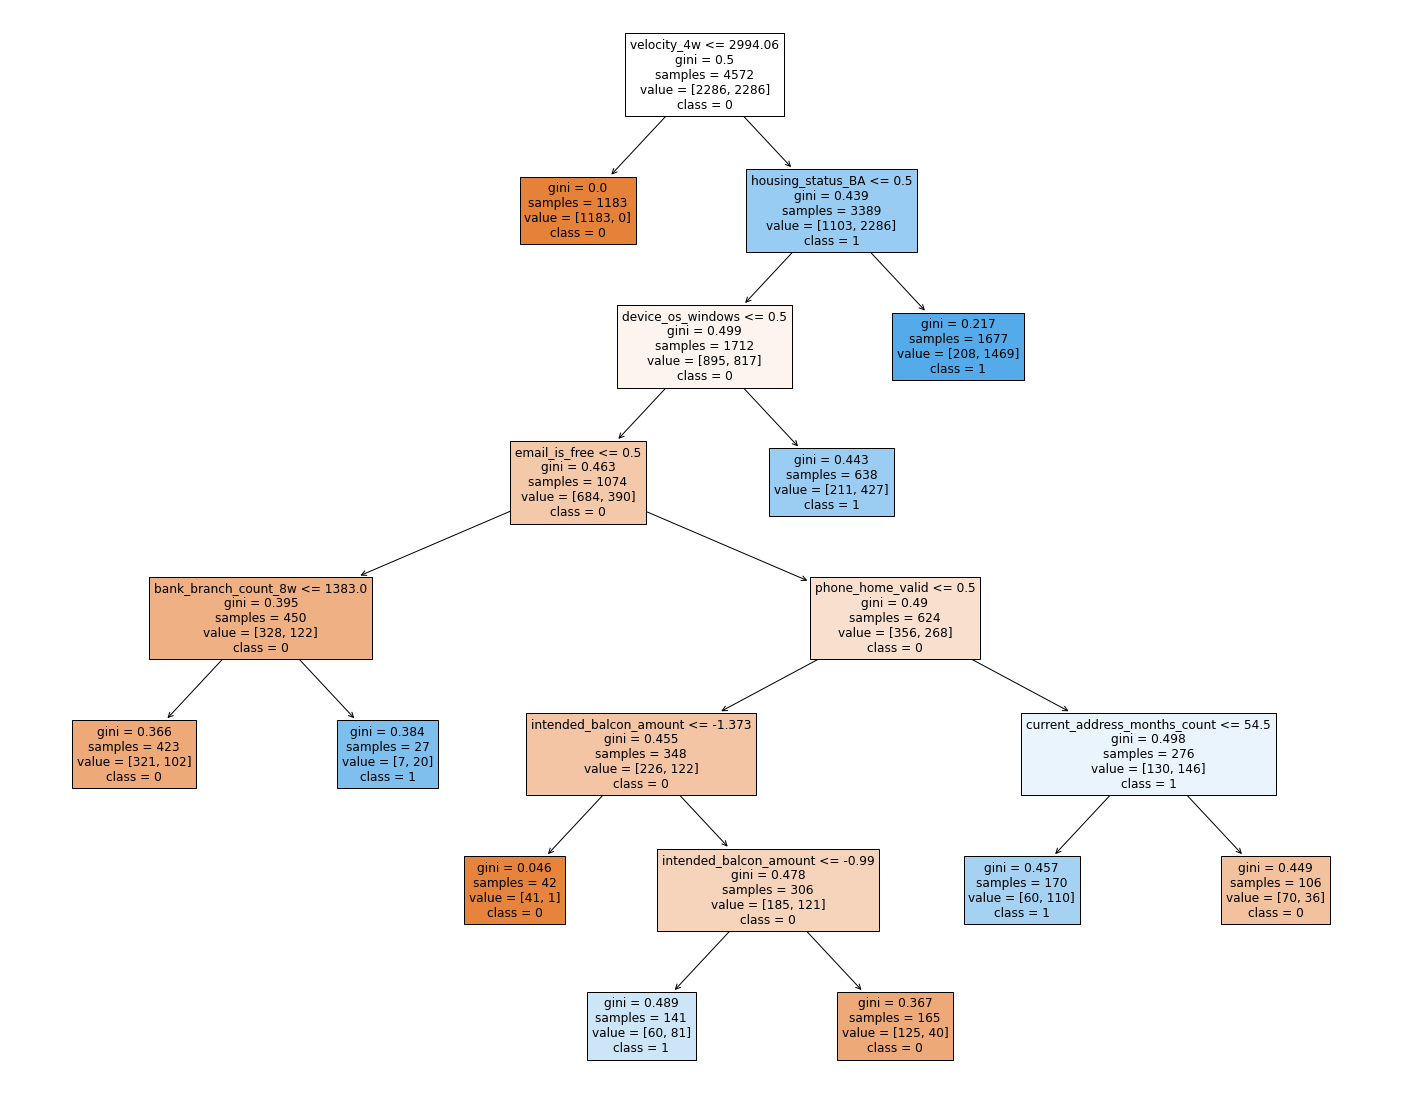

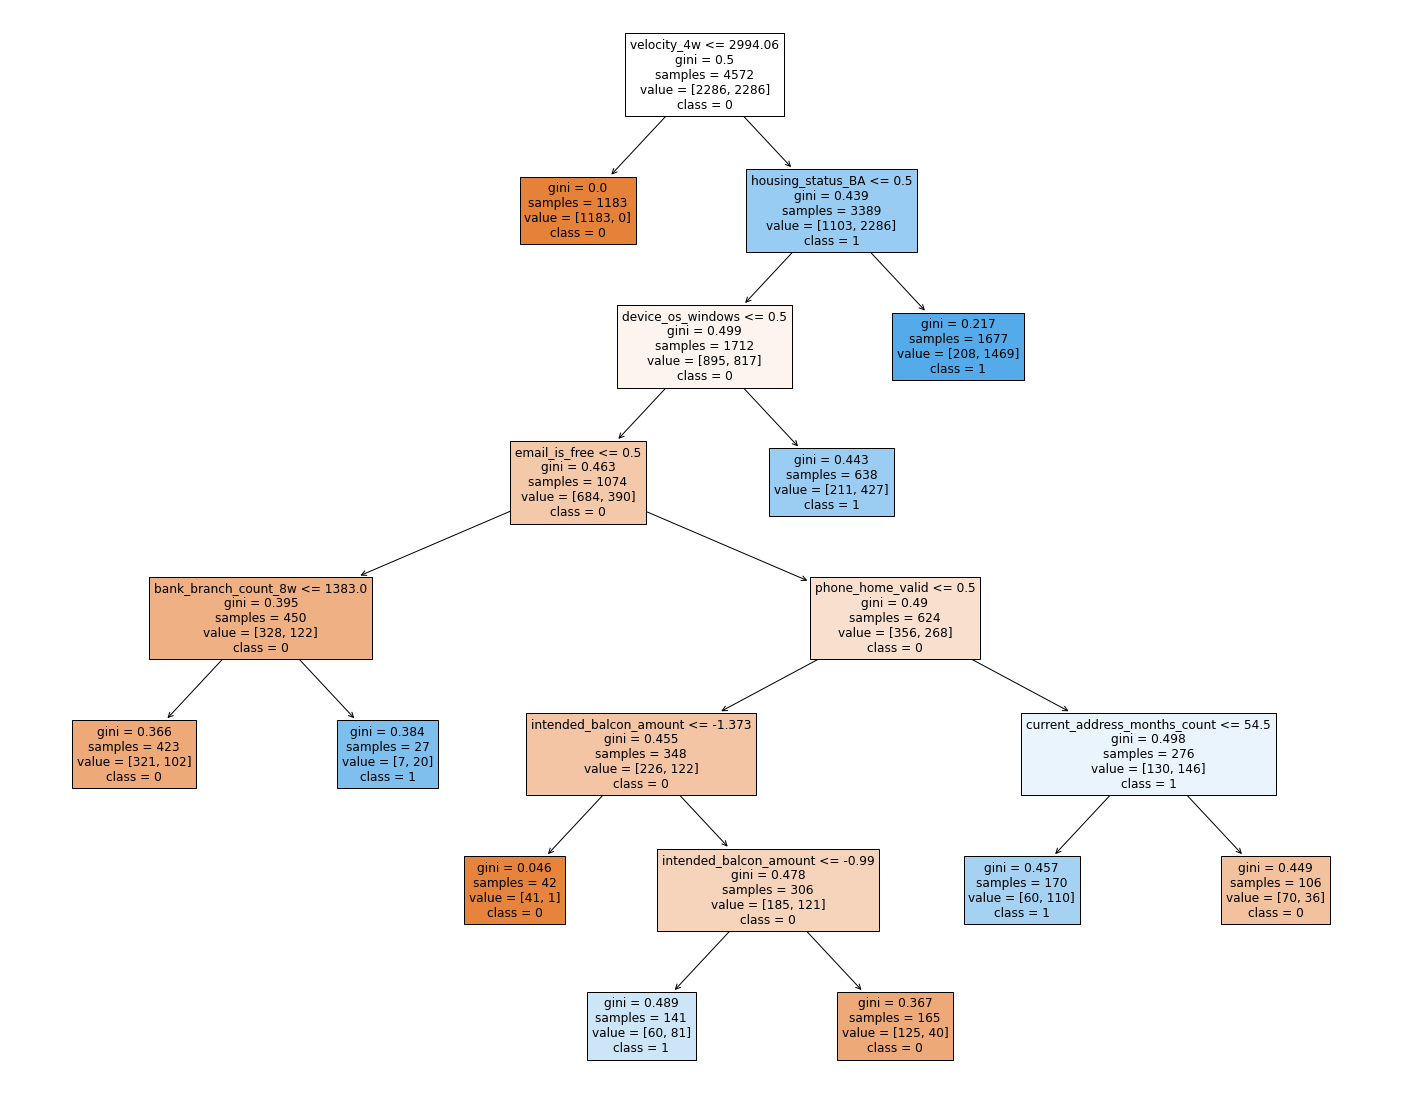

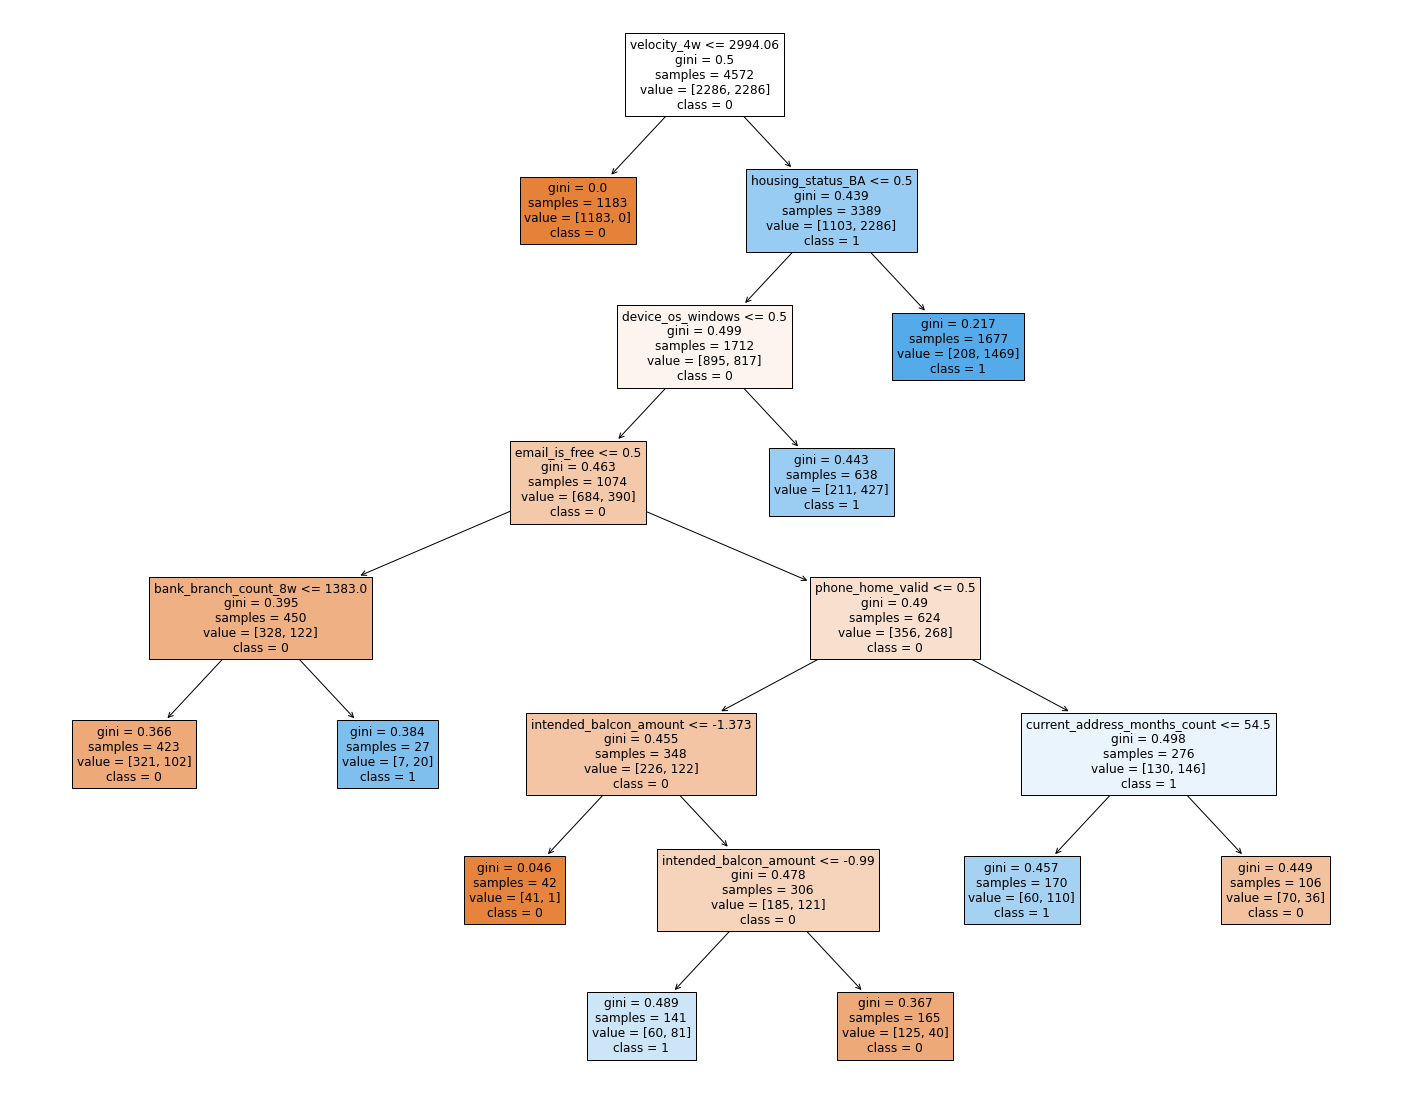

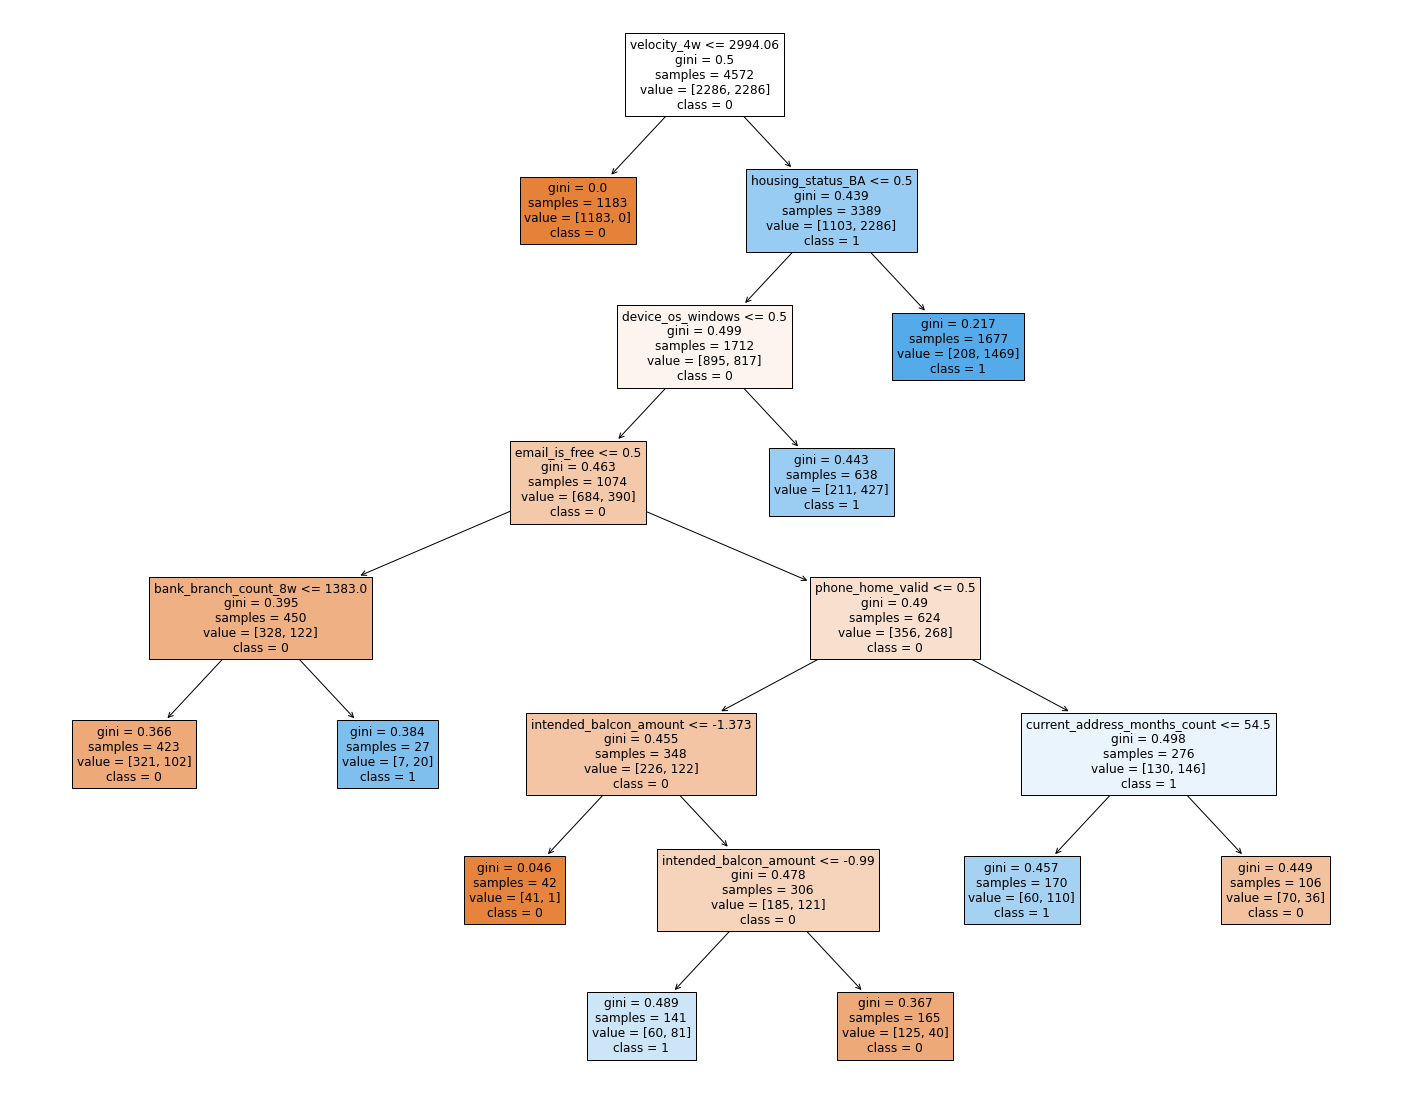

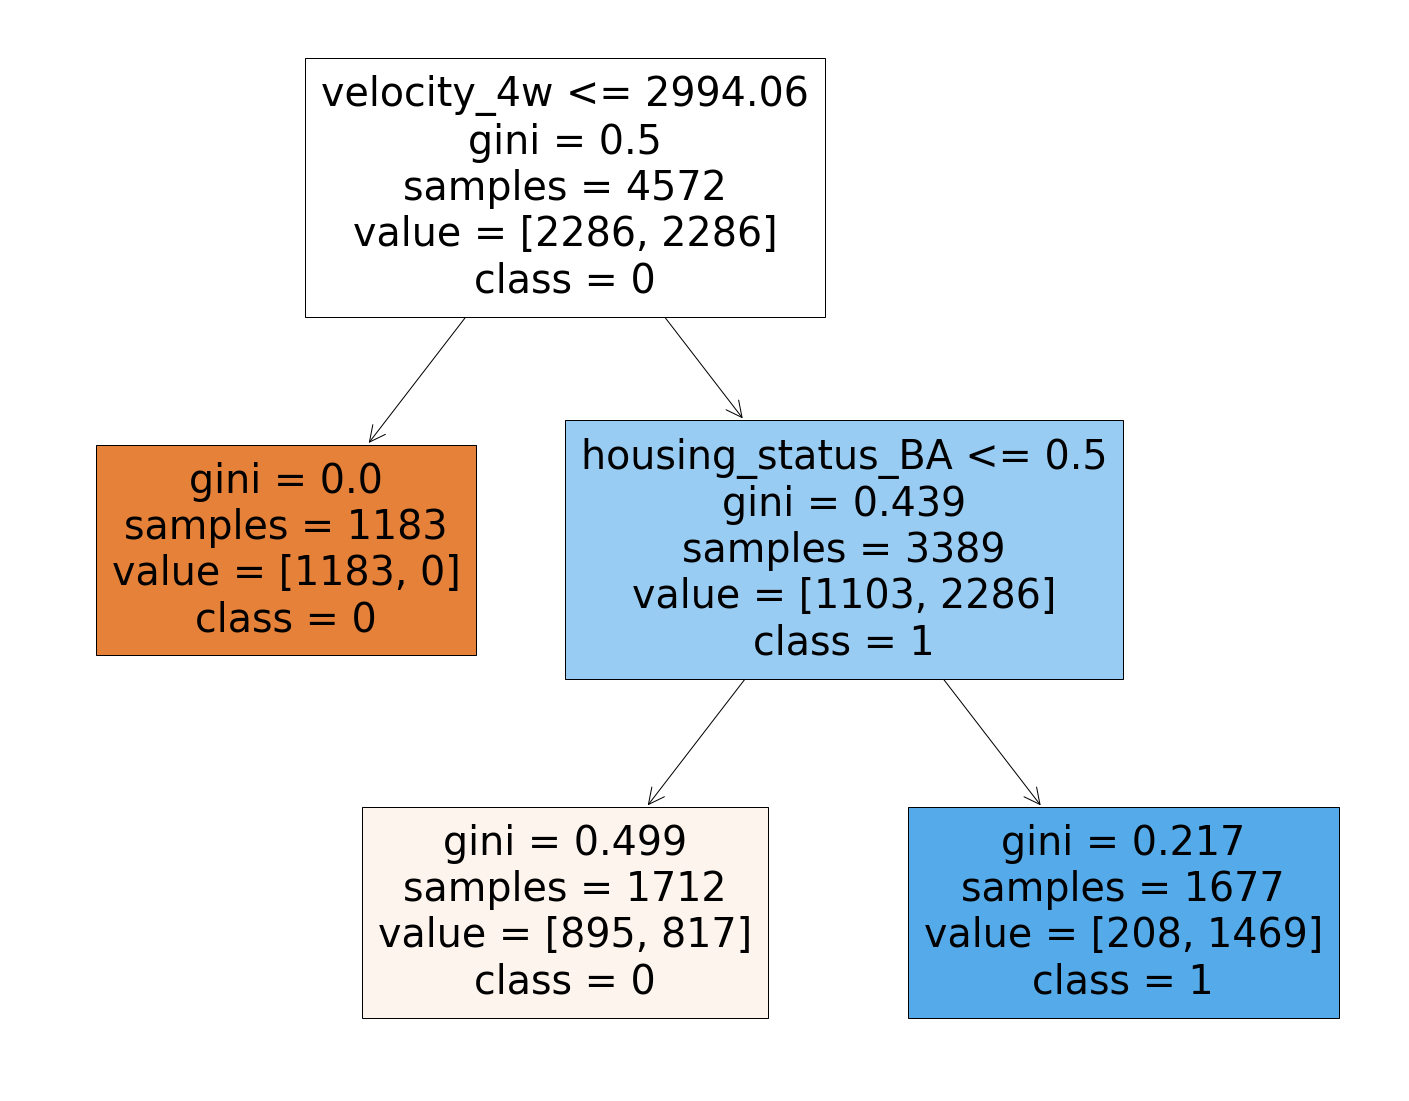

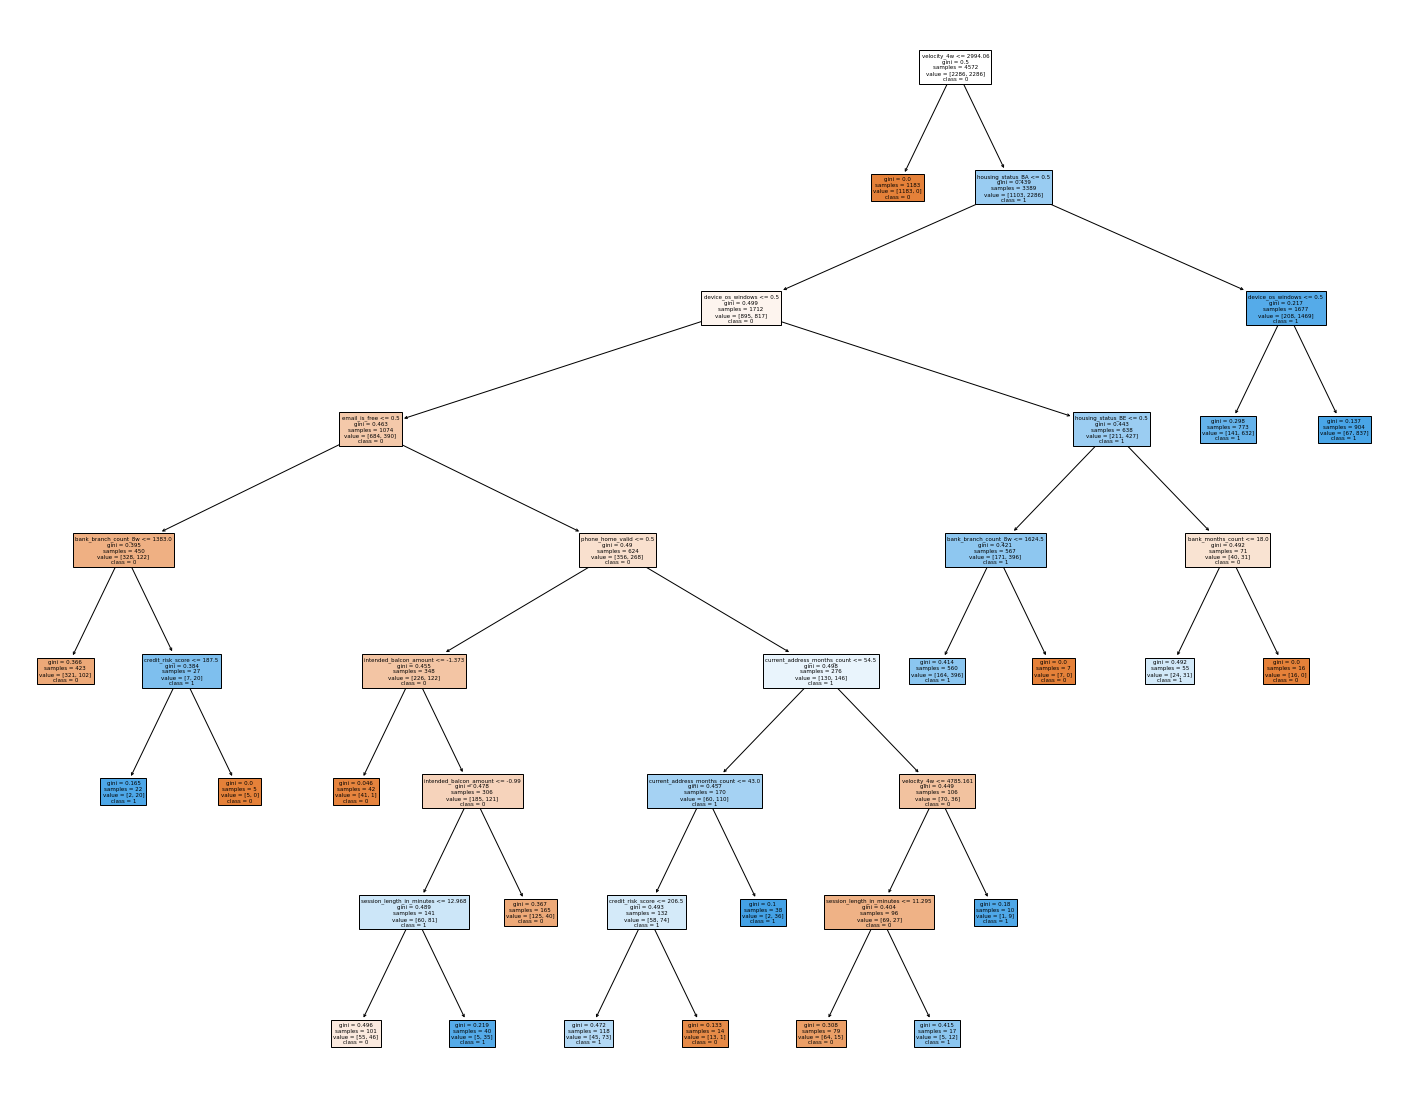

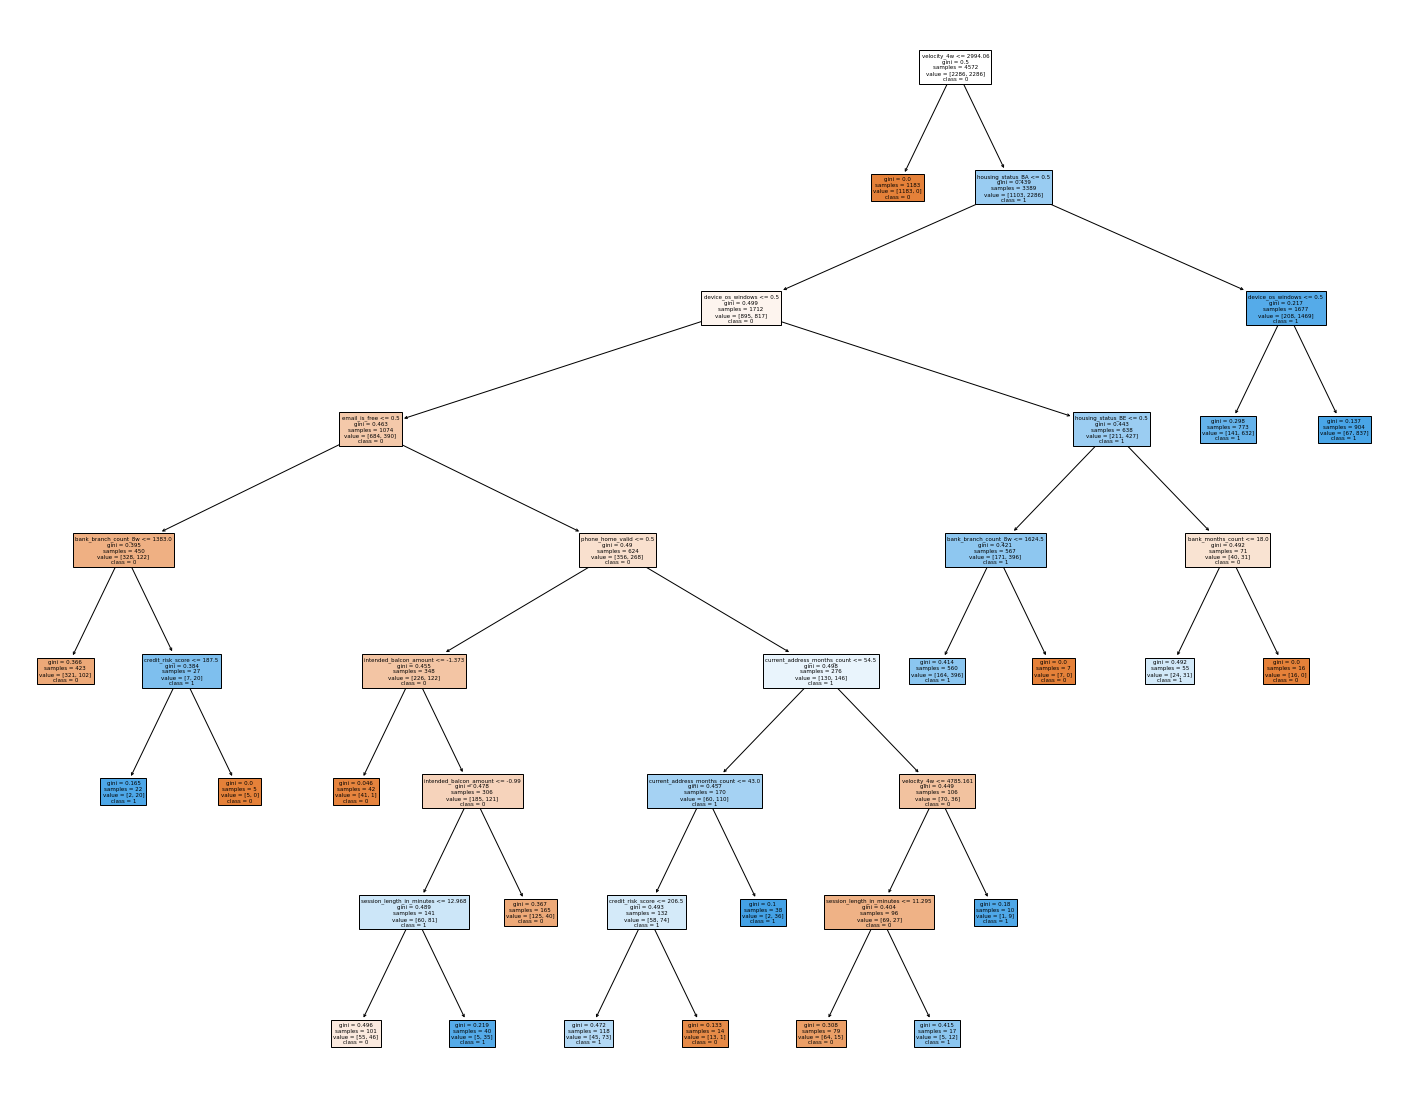

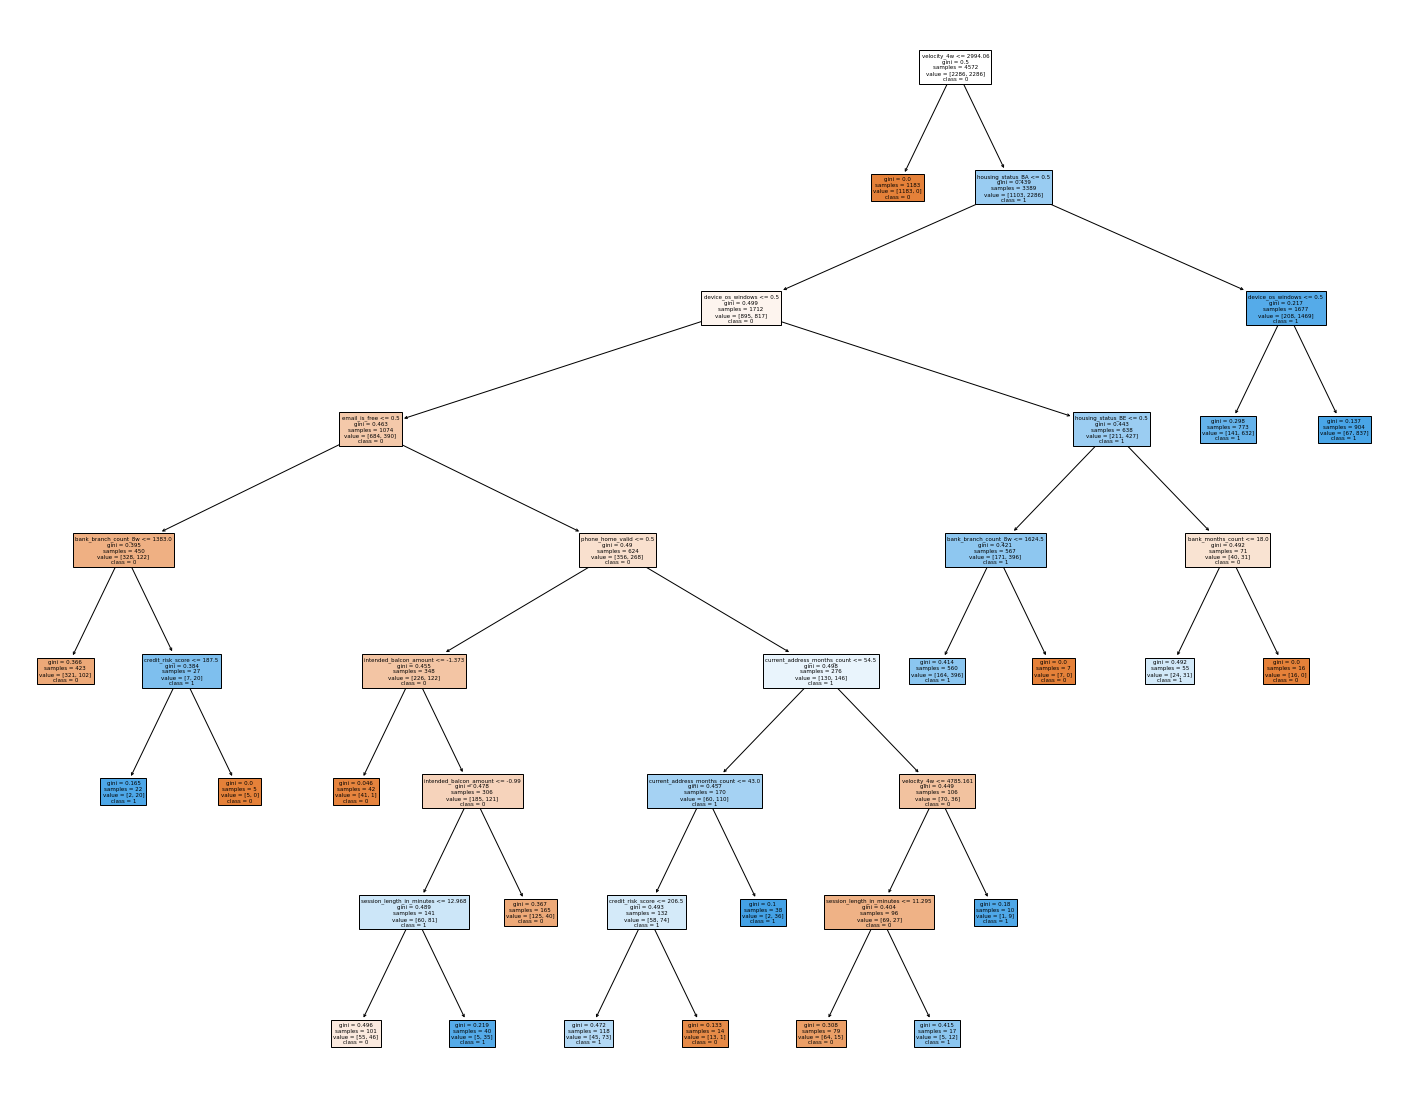

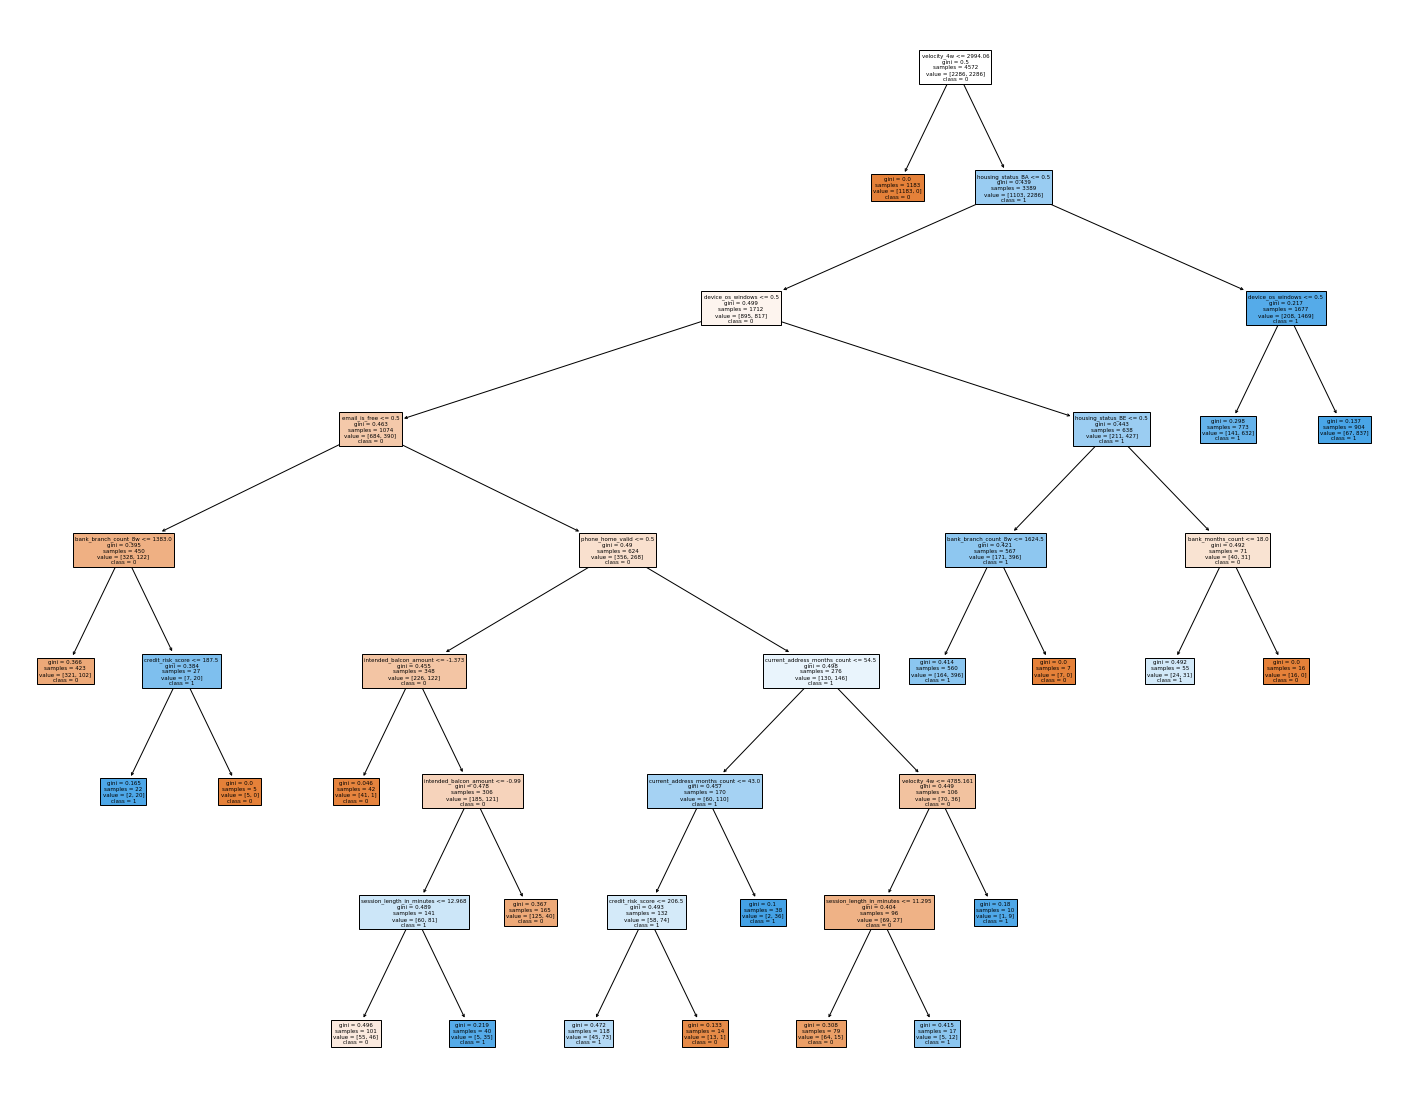

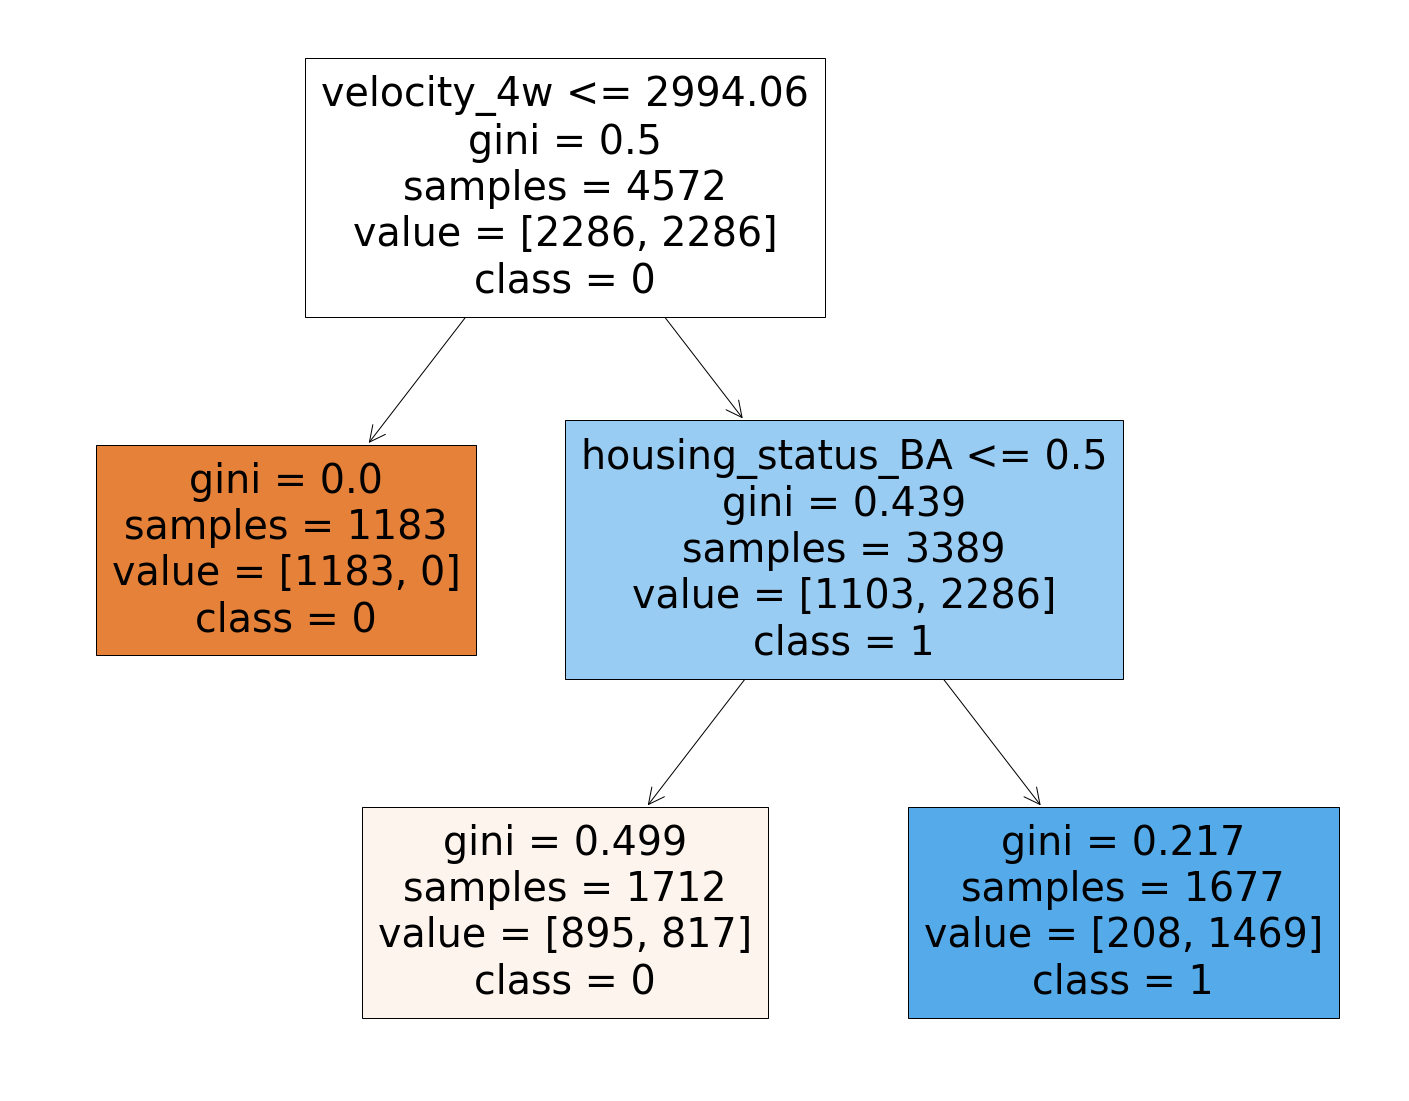

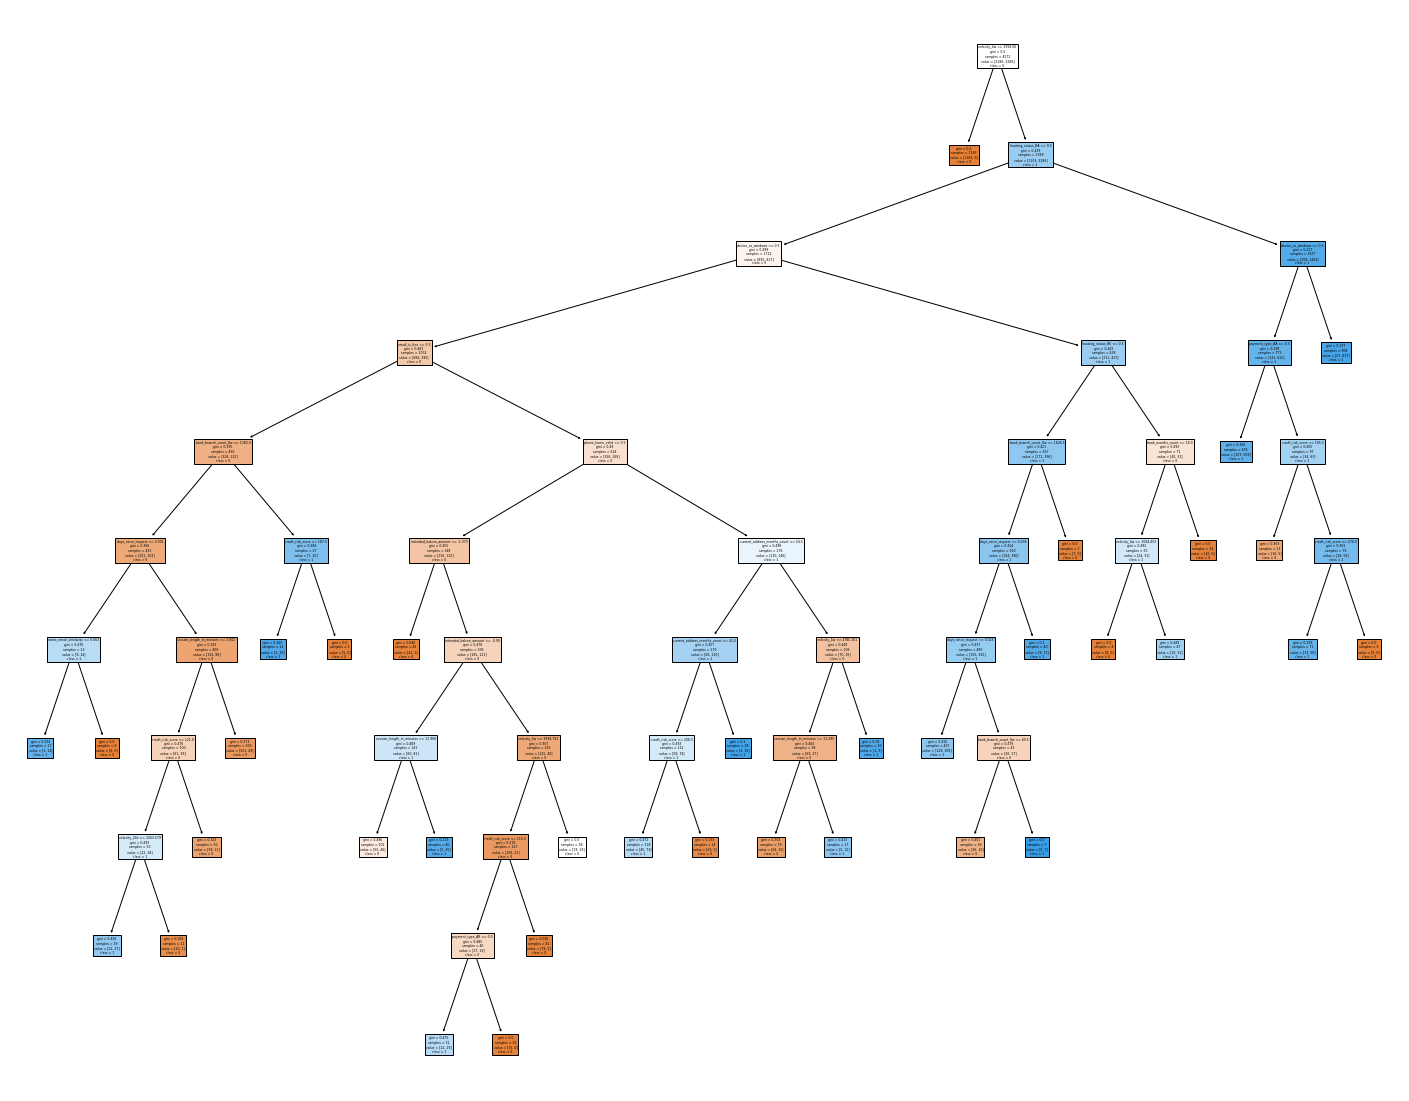

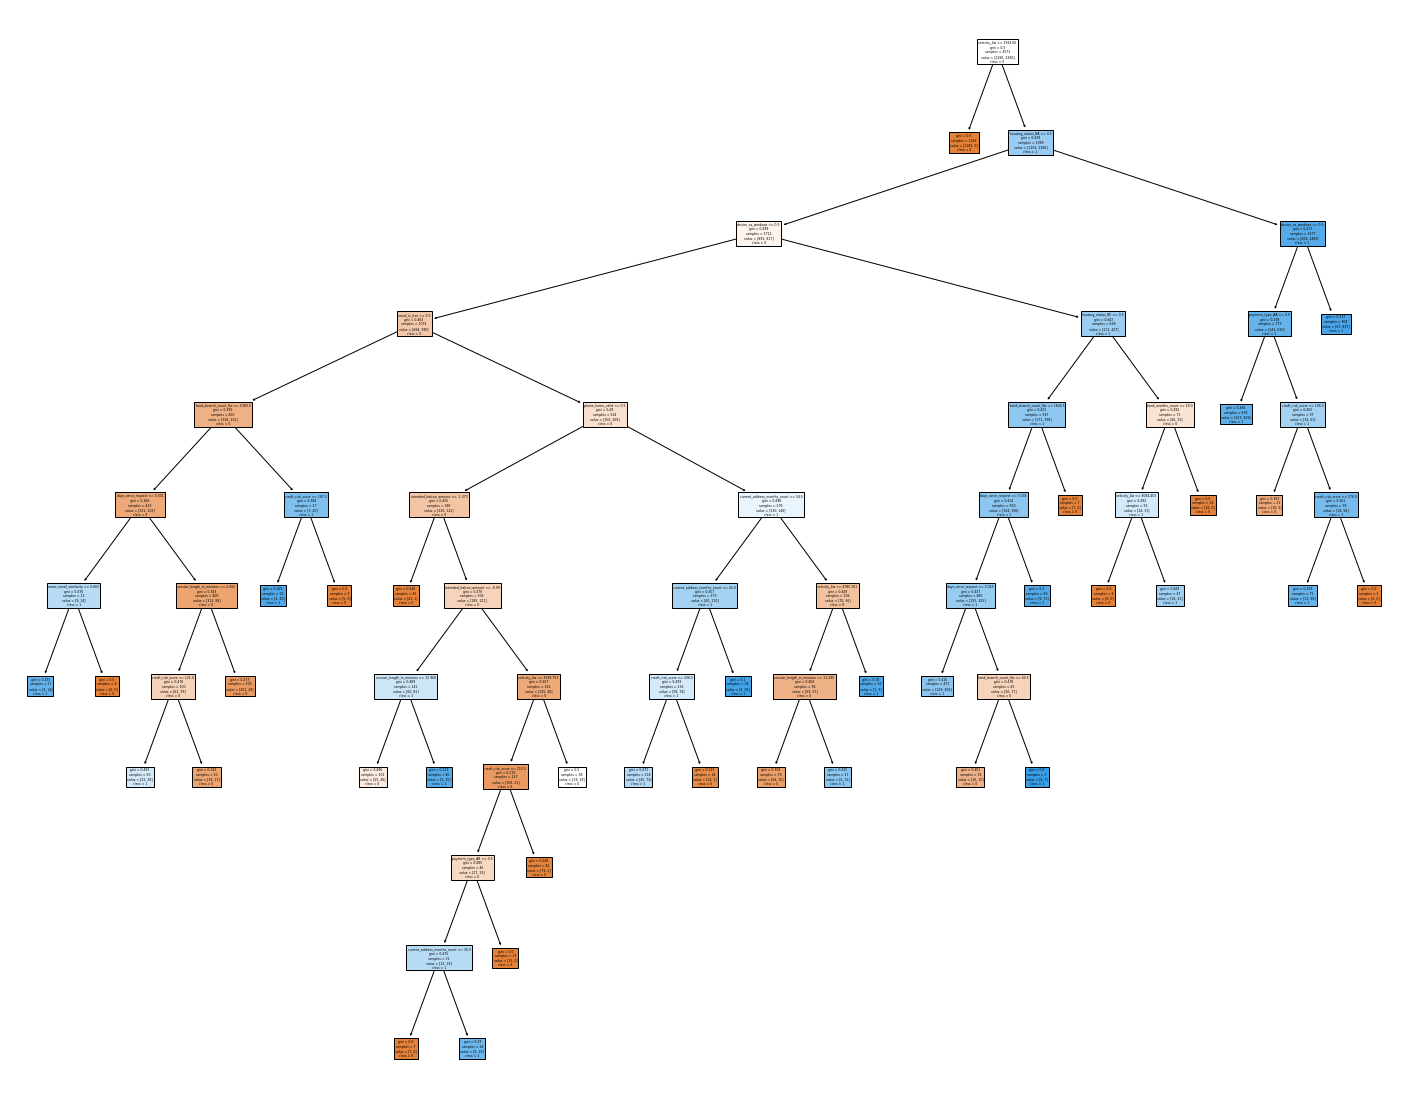

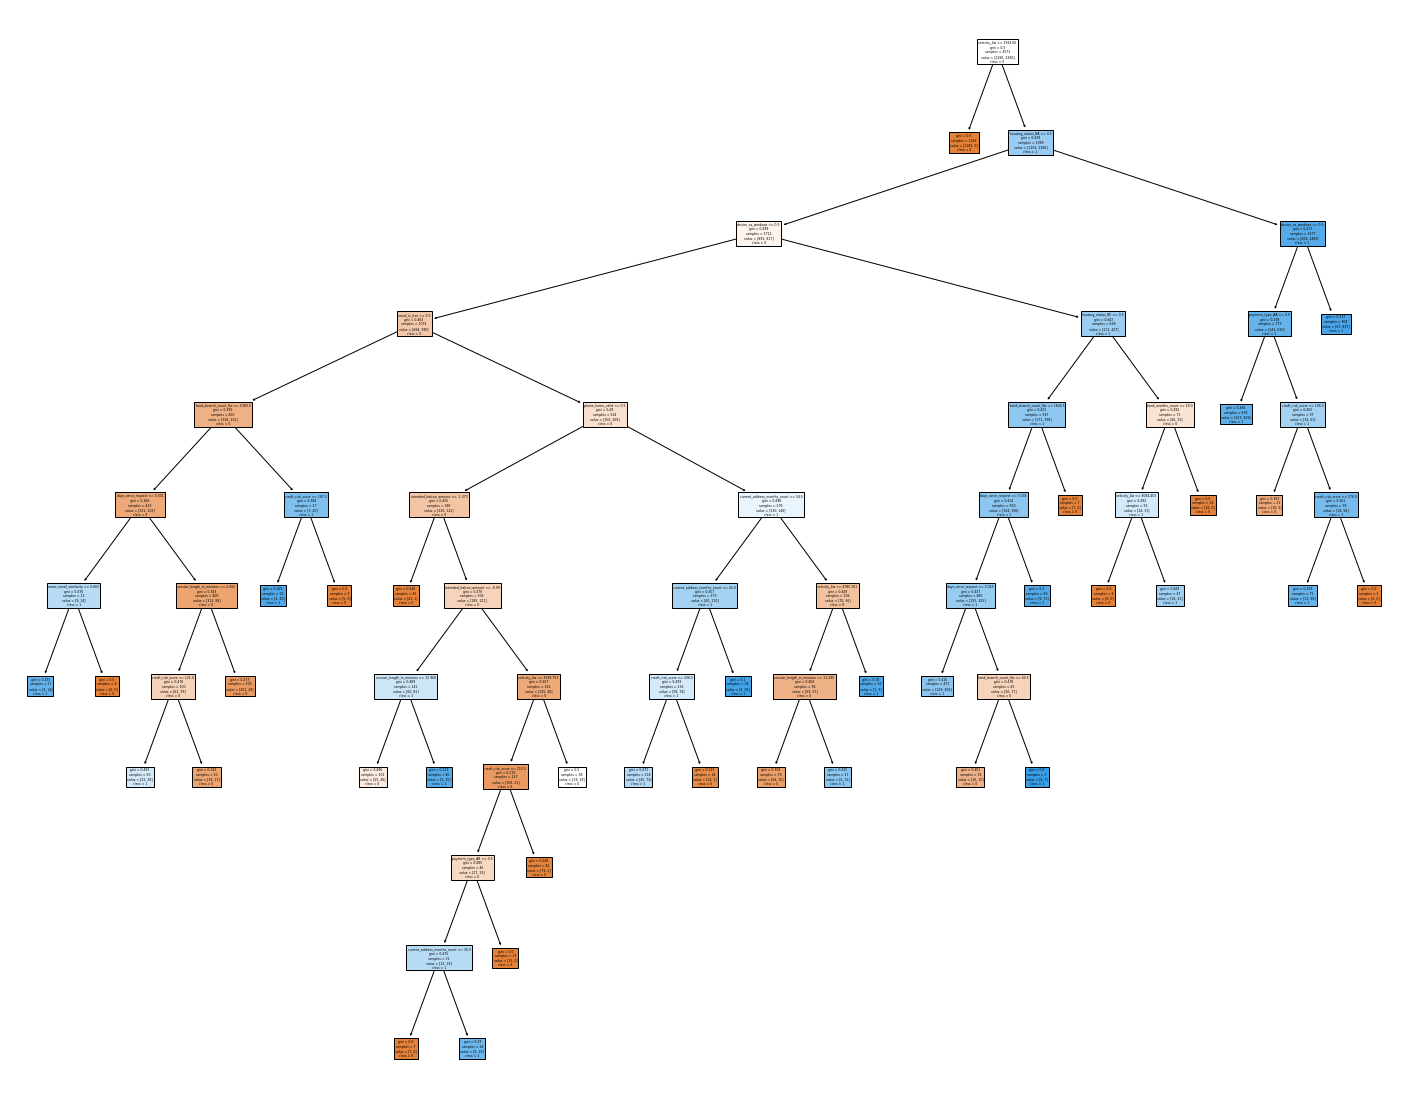

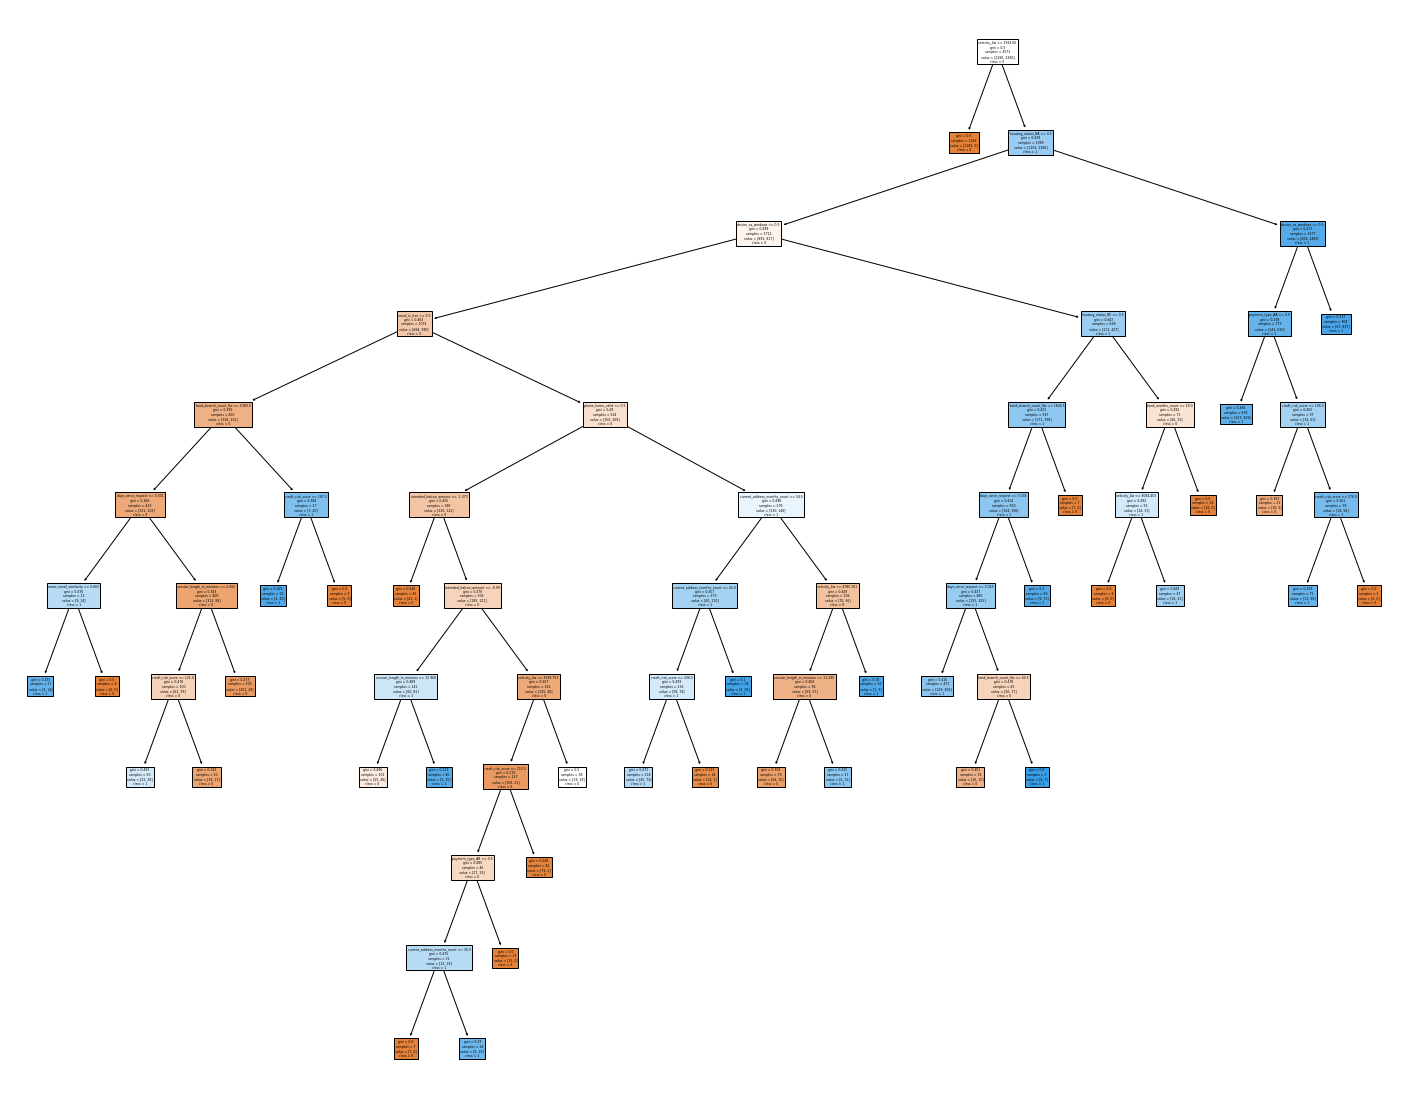

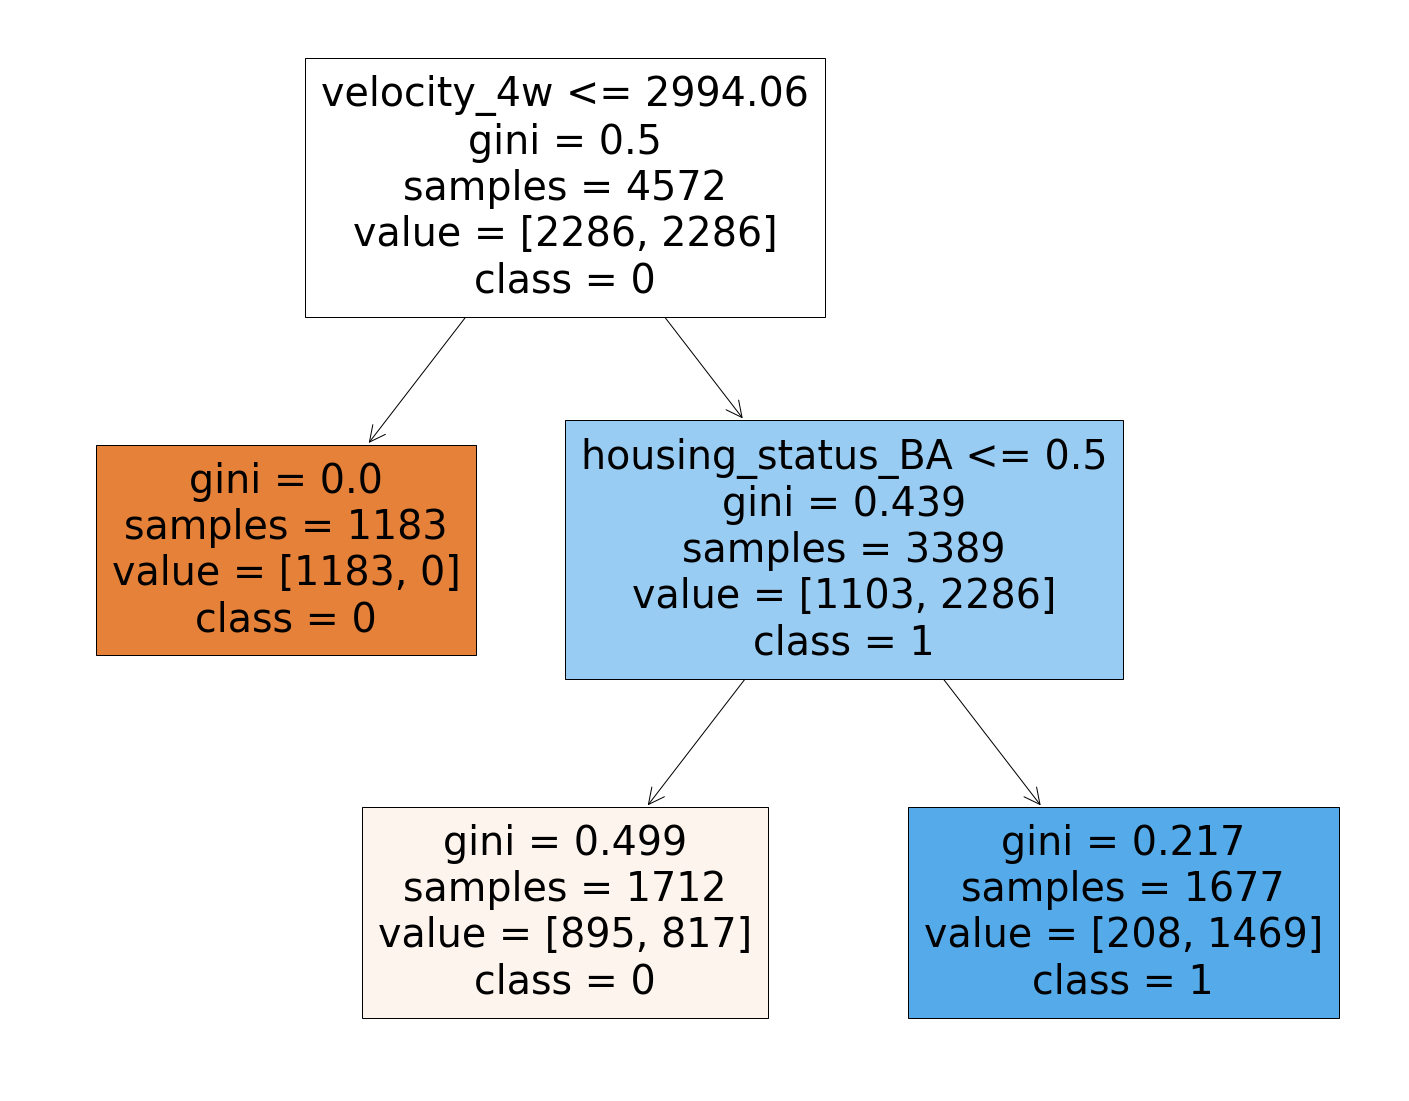

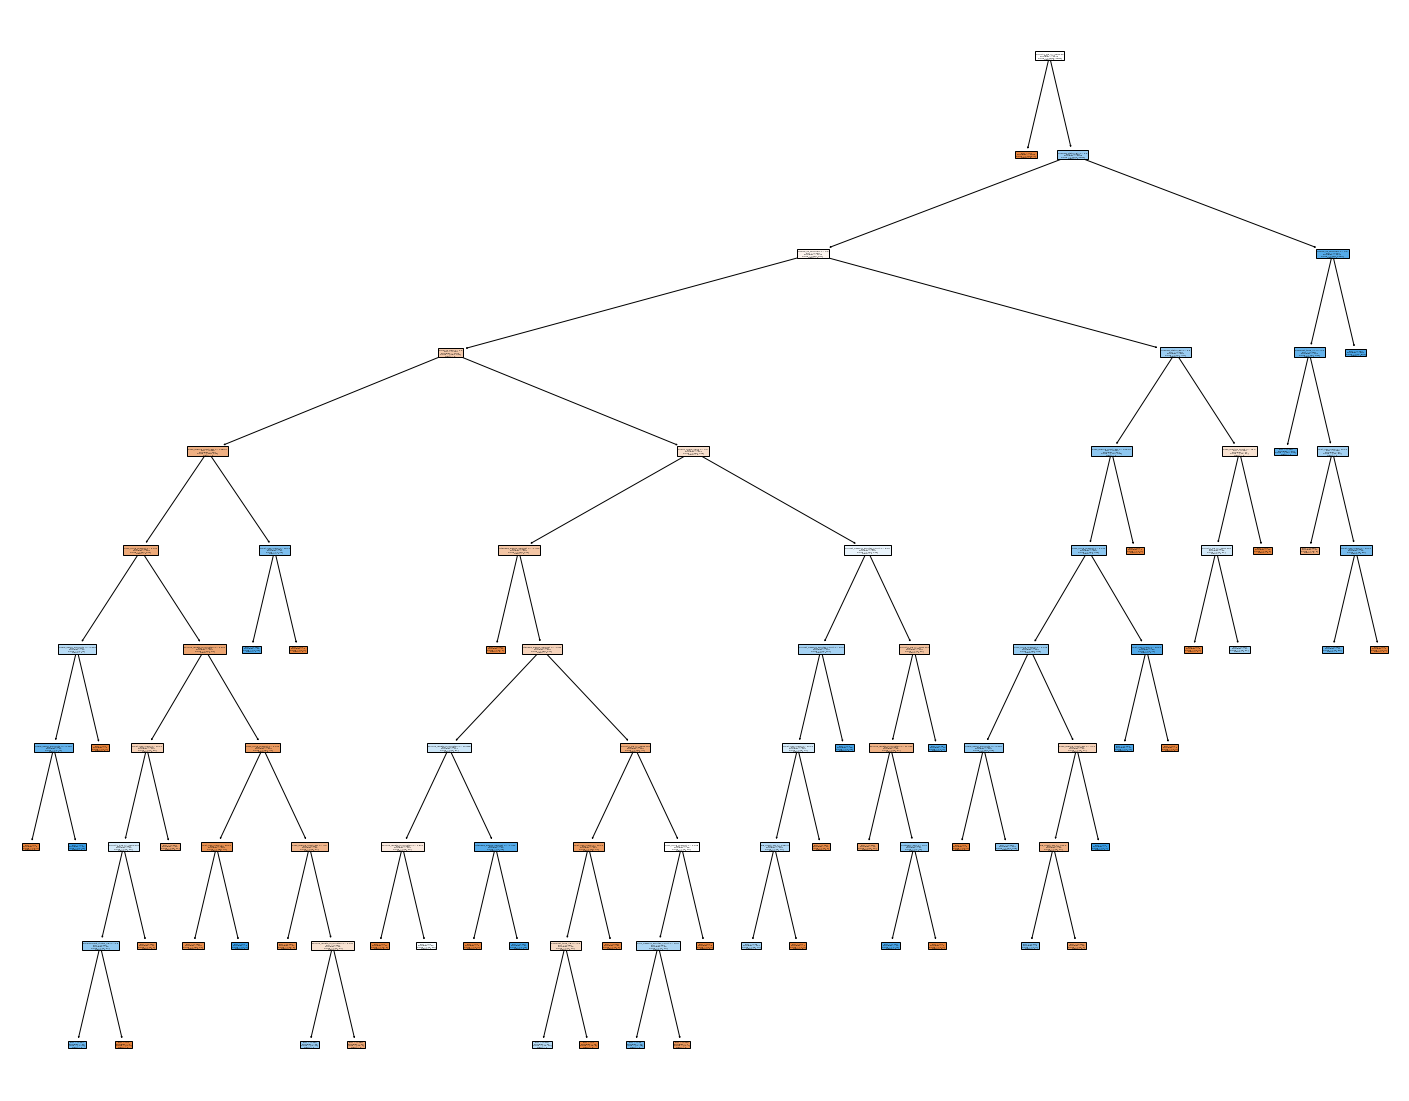

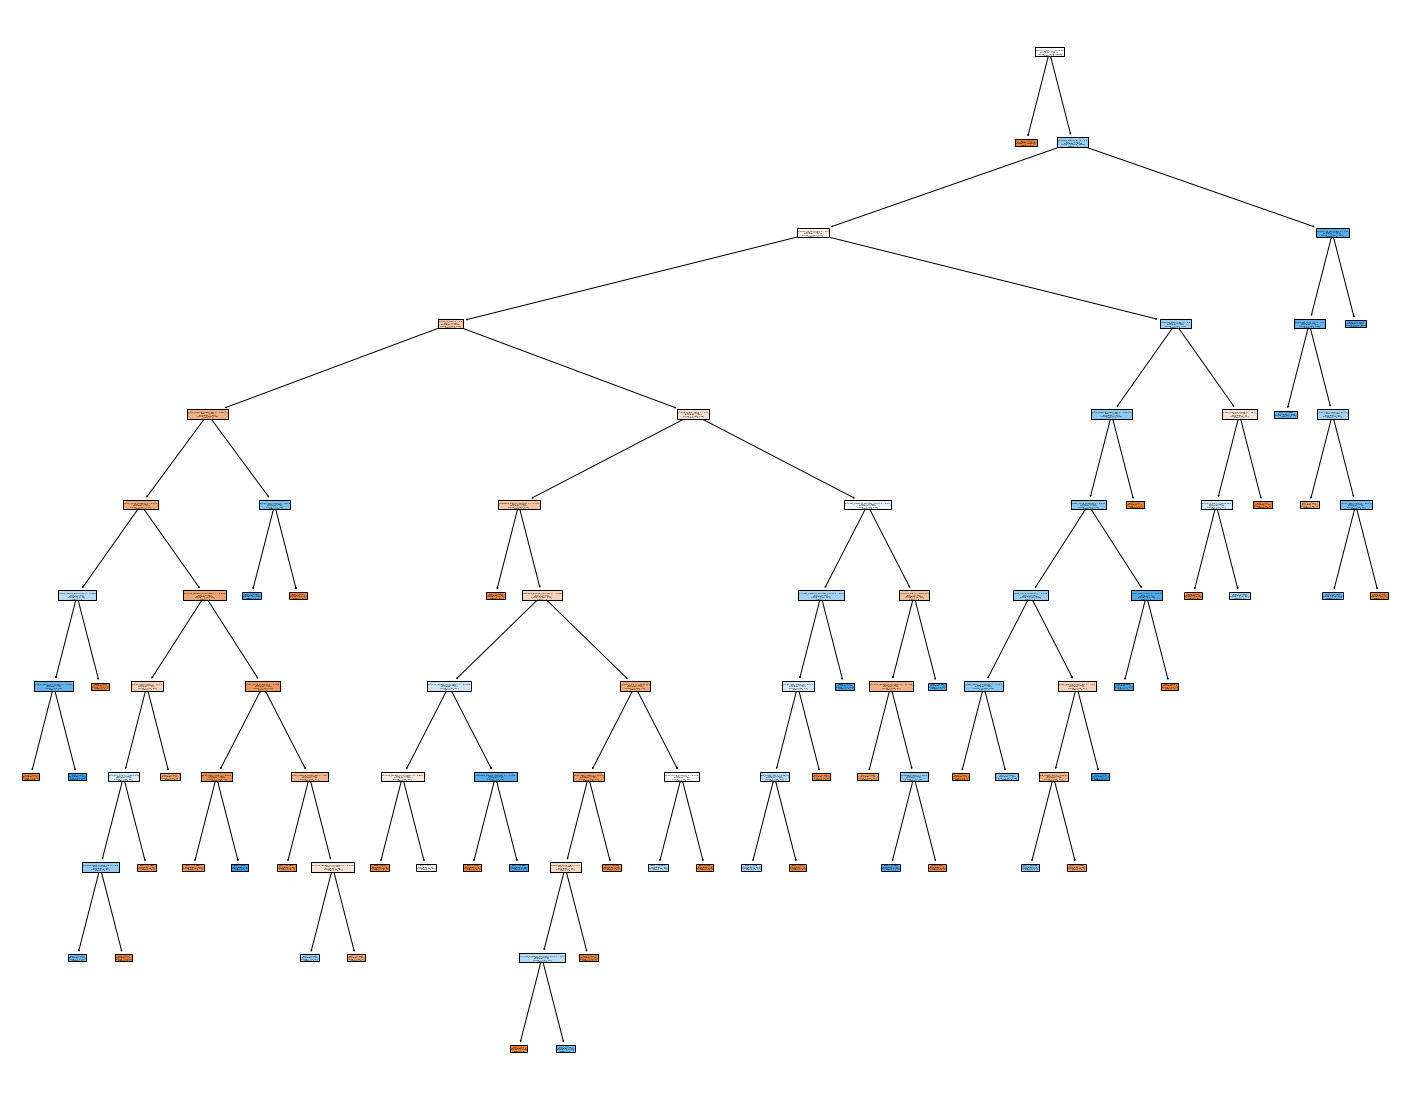

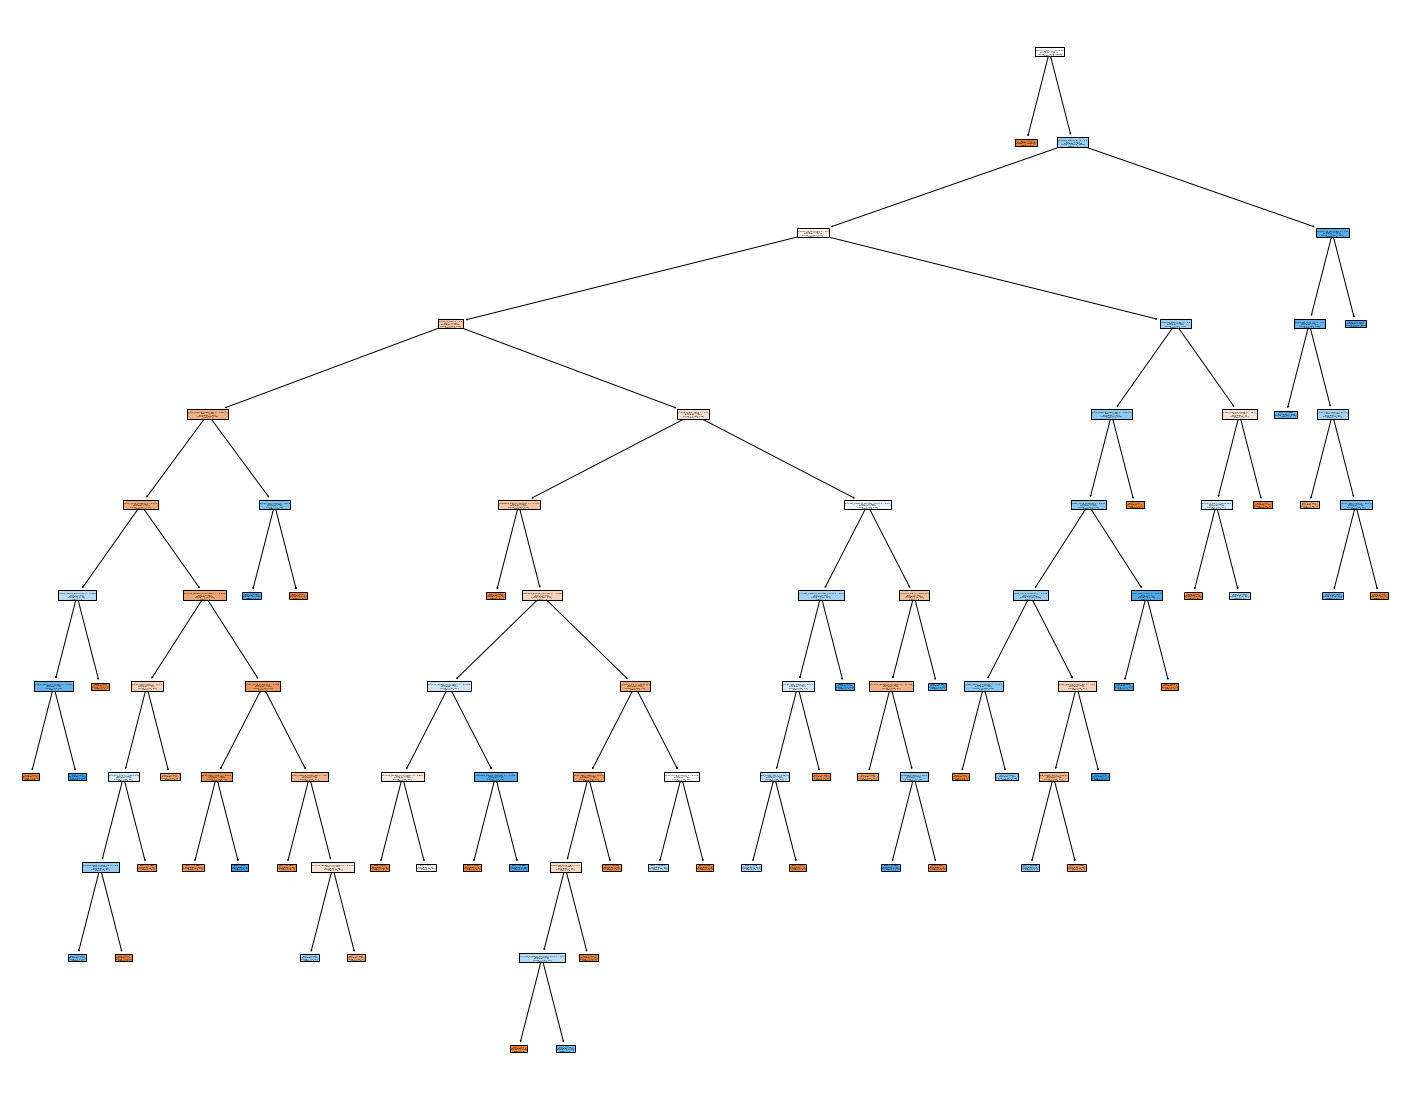

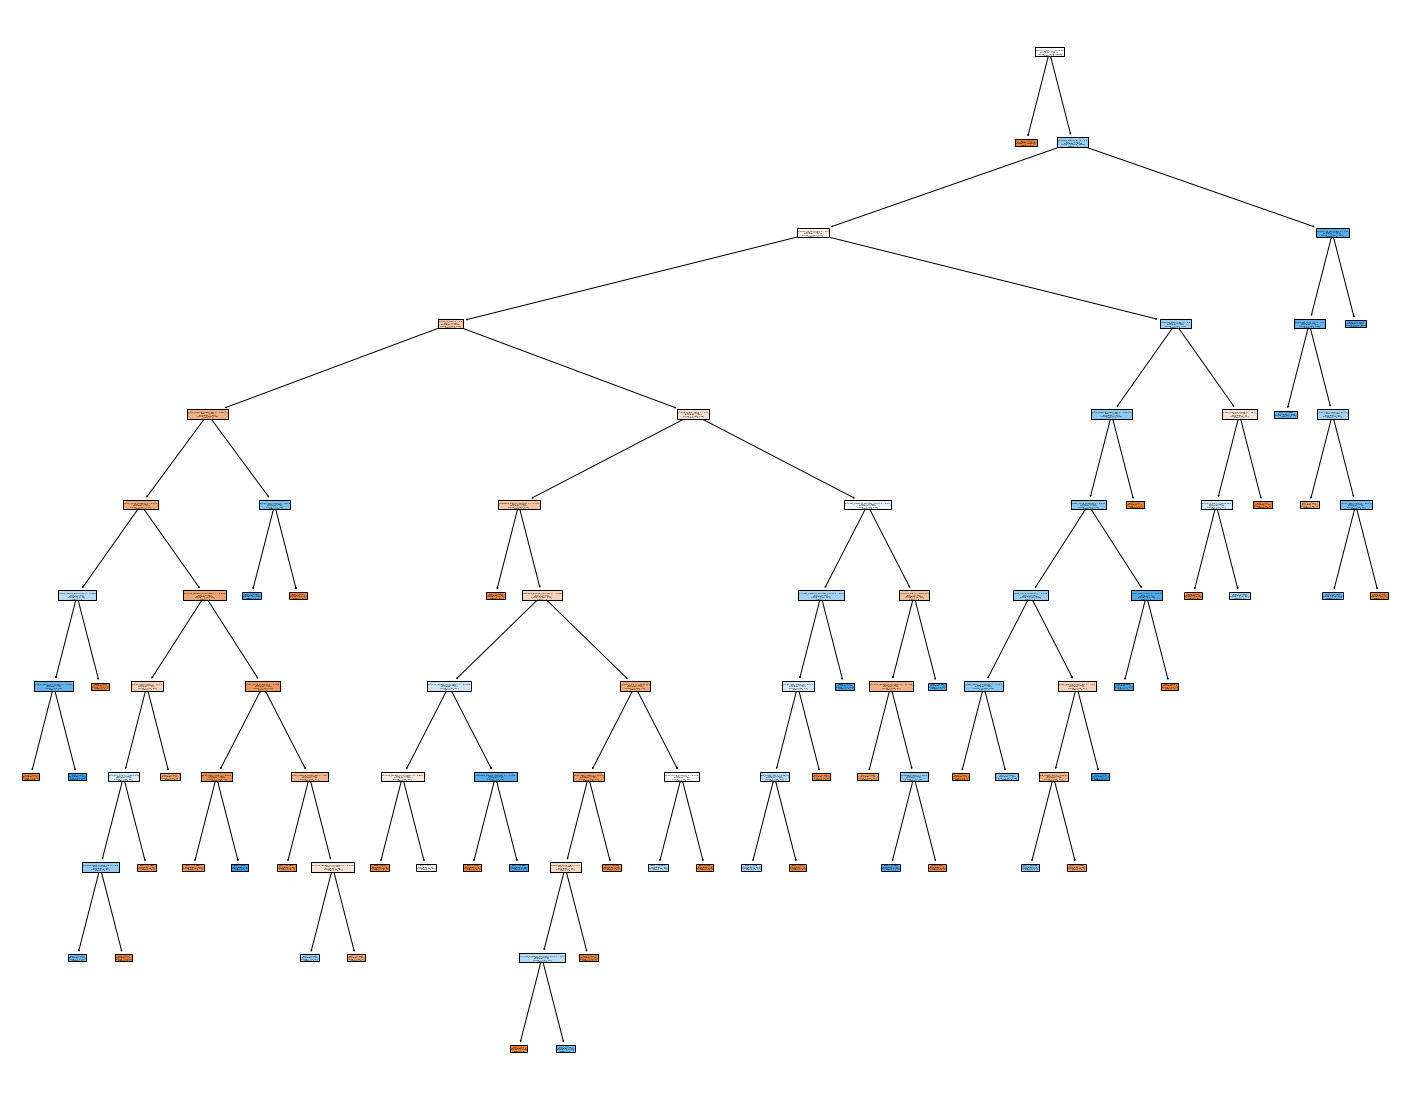

In [7]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
params = {'max_leaf_nodes': [2,10,20,35,50],
             'max_depth': [2,10,20,35,50]}
tune_perf = pd.DataFrame()
for x in [0,1,2,3,4]:
    for y in [0,1,2,3,4]:
        clf = tree.DecisionTreeClassifier(random_state = 0, max_leaf_nodes=params['max_leaf_nodes'][x], max_depth=params['max_depth'][y])
        fe_perf_loop = model(clf, X_train, y_train, X_valid, y_valid)
        fe_perf_loop['max_leaf_nodes'] = params['max_leaf_nodes'][x]
        fe_perf_loop['max_depth'] = params['max_depth'][y]
        tune_perf = tune_perf.append(fe_perf_loop)
        tree_graph(clf, X_train, y_train)
tune_perf['name'] = 'dt_tune'
tune_perf

In [8]:
tune_perf.sort_values(['max_depth','max_leaf_nodes'])

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.612     0.758      0.759     0.729         0.612     0.619   0.01562   
0  0.815     0.776      0.776     0.751         0.815     0.810   0.00000   
0  0.815     0.776      0.776     0.751         0.815     0.810   0.00000   
0  0.815     0.776      0.776     0.751         0.815     0.810   0.00000   
0  0.815     0.776      0.776     0.751         0.815     0.810   0.01562   
0  0.612     0.758      0.759     0.729         0.612     0.619   0.00000   
0  0.759     0.825      0.841     0.786         0.759     0.770   0.01562   
0  0.782     0.832      0.855     0.796         0.782     0.791   0.01562   
0  0.781     0.838      0.871     0.794         0.781     0.790   0.00000   
0  0.761     0.845      0.885     0.784         0.761     0.772   0.01562   
0  0.612     0.758      0.759     0.729         0.612     0.619   0.00000   
0  0.759     0.825      0.841     0.786         0.759     0.770   0.01562   
0  0.782     0.832      0.855     0.796         0.782     0.791   0.01562   
0  0.782     0.841      0.871     0.798         0.782     0.792   0.01562   
0  0.764     0.852      0.885     0.789         0.764     0.774   0.03125   
0  0.612     0.758      0.759     0.729         0.612     0.619   0.00000   
0  0.759     0.825      0.841     0.786         0.759     0.770   0.00000   
0  0.782     0.832      0.855     0.796         0.782     0.791   0.00000   
0  0.782     0.841      0.871     0.798         0.782     0.792   0.01562   
0  0.764     0.852      0.885     0.789         0.764     0.774   0.03125   
0  0.612     0.758      0.759     0.729         0.612     0.619   0.00000   
0  0.759     0.825      0.841     0.786         0.759     0.770   0.00000   
0  0.782     0.832      0.855     0.796         0.782     0.791   0.00000   
0  0.782     0.841      0.871     0.798         0.782     0.792   0.03125   
0  0.764     0.852      0.885     0.789         0.764     0.774   0.00000   

   max_leaf_nodes  max_depth     name  
0               2          2  dt_tune  
0              10          2  dt_tune  
0              20          2  dt_tune  
0              35          2  dt_tune  
0              50          2  dt_tune  
0               2         10  dt_tune  
0              10         10  dt_tune  
0              20         10  dt_tune  
0              35         10  dt_tune  
0              50         10  dt_tune  
0               2         20  dt_tune  
0              10         20  dt_tune  
0              20         20  dt_tune  
0              35         20  dt_tune  
0              50         20  dt_tune  
0               2         35  dt_tune  
0              10         35  dt_tune  
0              20         35  dt_tune  
0              35         35  dt_tune  
0              50         35  dt_tune  
0               2         50  dt_tune  
0              10         50  dt_tune  
0              20         50  dt_tune  
0              35         50  dt_tune  
0              50         50  dt_tune

## model1.4 - Decision tree Grid Search

In [9]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
t_start = process_time()
parameters = {'max_depth':range(2,20,2),'max_leaf_nodes': range(2,20,2)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, scoring='roc_auc', n_jobs=-1, cv=3)
clf.fit(X=X_train, y=y_train)
t_stop = process_time()
print (clf.best_score_, clf.best_params_, 'time spend: ', round(t_stop - t_start, 3))
md = clf.best_params_['max_depth']
mln = clf.best_params_['max_leaf_nodes']

0.8990615018267073 {'max_depth': 4, 'max_leaf_nodes': 12} time spend:  0.641


acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.802     0.821      0.825       0.8         0.802     0.809       0.0   

             name  max_leaf_nodes  max_depth  
0  dt_grid_search              12          4

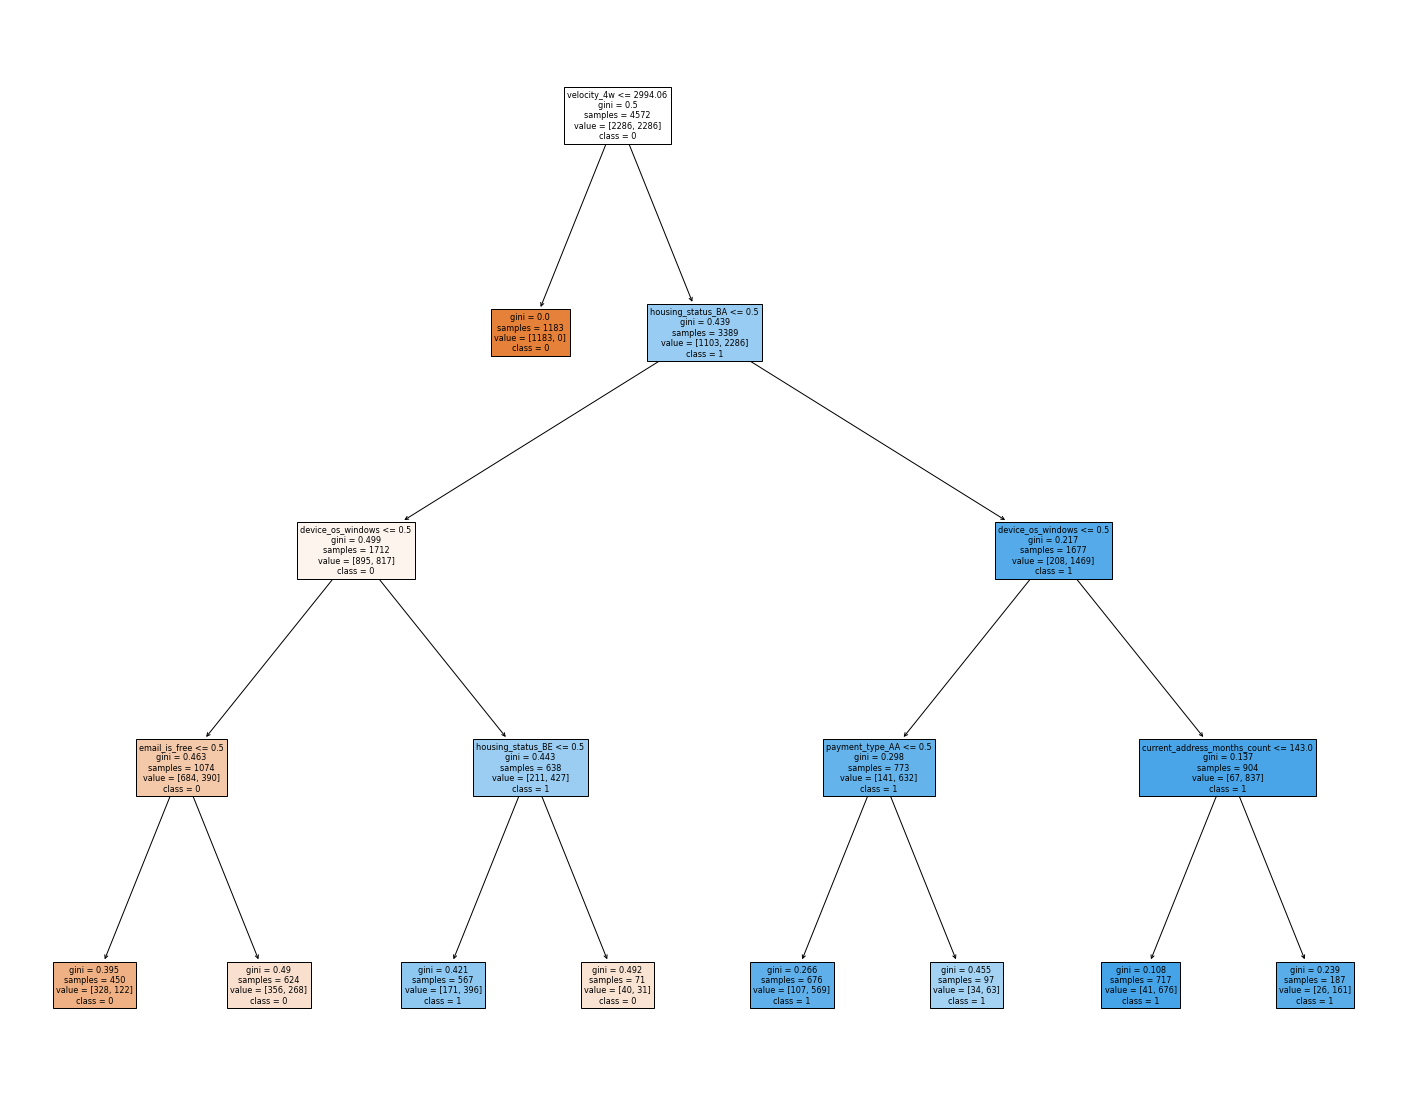

In [10]:
clf = tree.DecisionTreeClassifier(max_depth = md, max_leaf_nodes = mln)
gs_perf = model(clf, X_train, y_train, X_valid, y_valid)
tree_graph(clf, X_train, y_train)
gs_perf['name'] = 'dt_grid_search'
gs_perf['max_leaf_nodes'] = mln
gs_perf['max_depth'] = md
gs_perf


## model1.5 - Decision tree learning curve

In [11]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# create an empty df for output
le_perf_out = pd.DataFrame()
for r in [0.1, 0.2,0.3, 0.4, 0.5,0.6, 0.7,0.8,0.9,1.0]:
    # frac train set to build model
#     print(len(X_train))
    X_trainf = X_train.sample(frac = r, random_state=0)
    y_trainf = y_train.loc[X_trainf.index]
    
#     print(len(X_trainf), len(y_trainf))
    # feature engineering
    X_trainf, X_valid, X_test = ohe(X_trainf, X_valid, X_test)
    # oversampling
    X_trainf, y_trainf = oversampling(X_trainf, y_trainf)
    # model
    params = {'max_leaf_nodes': mln,
                 'max_depth': md}

    clf = tree.DecisionTreeClassifier(random_state = 0, max_leaf_nodes=params['max_leaf_nodes'], max_depth=params['max_depth'])
    le_perf = model(clf, X_trainf, y_trainf, X_valid, y_valid)
    # add columns
    le_perf['train_ratio'] = str(r)
    le_perf['max_leaf_nodes'] = mln
    le_perf['max_depth'] = md
    le_perf['name'] = 'dt_train_size'
    le_perf_out = le_perf_out.append(le_perf)
    
le_perf_out

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.771     0.745      0.757     0.750         0.771     0.777   0.00000   
0  0.802     0.792      0.798     0.799         0.802     0.809   0.00000   
0  0.890     0.893      0.895     0.865         0.890     0.890   0.00000   
0  0.948     0.945      0.953     0.946         0.948     0.948   0.00000   
0  0.959     0.980      0.983     0.970         0.959     0.959   0.00000   
0  0.868     0.939      0.947     0.899         0.868     0.873   0.00000   
0  0.805     0.894      0.903     0.860         0.805     0.814   0.00000   
0  0.832     0.854      0.861     0.824         0.832     0.837   0.01562   
0  0.798     0.836      0.846     0.803         0.798     0.805   0.00000   
0  0.790     0.825      0.827     0.794         0.790     0.798   0.00000   

  train_ratio  max_leaf_nodes  max_depth           name  
0         0.1              12          4  dt_train_size  
0         0.2              12          4  dt_train_size  
0         0.3              12          4  dt_train_size  
0         0.4              12          4  dt_train_size  
0         0.5              12          4  dt_train_size  
0         0.6              12          4  dt_train_size  
0         0.7              12          4  dt_train_size  
0         0.8              12          4  dt_train_size  
0         0.9              12          4  dt_train_size  
0         1.0              12          4  dt_train_size

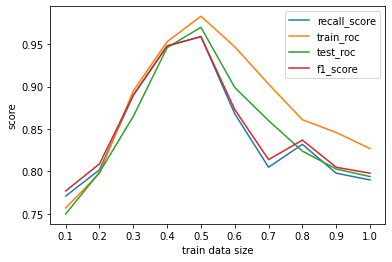

In [12]:
learning_curve_graph(le_perf_out)

# Decision Tree test set output

In [13]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
params = {'max_leaf_nodes': mln,
             'max_depth': md
            }
clf = tree.DecisionTreeClassifier(random_state = 0,max_leaf_nodes=mln, max_depth=md)
dt_test_perf = model(clf, X_train, y_train, X_test, y_test)
dt_test_perf['max_leaf_nodes'] = mln
dt_test_perf['max_depth'] = md
dt_test_perf['name'] = 'dt_test'
dt_test_perf

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.815     0.821      0.825     0.813         0.815     0.821       0.0   

   max_leaf_nodes  max_depth     name  
0              12          4  dt_test

# Decision tree model summary

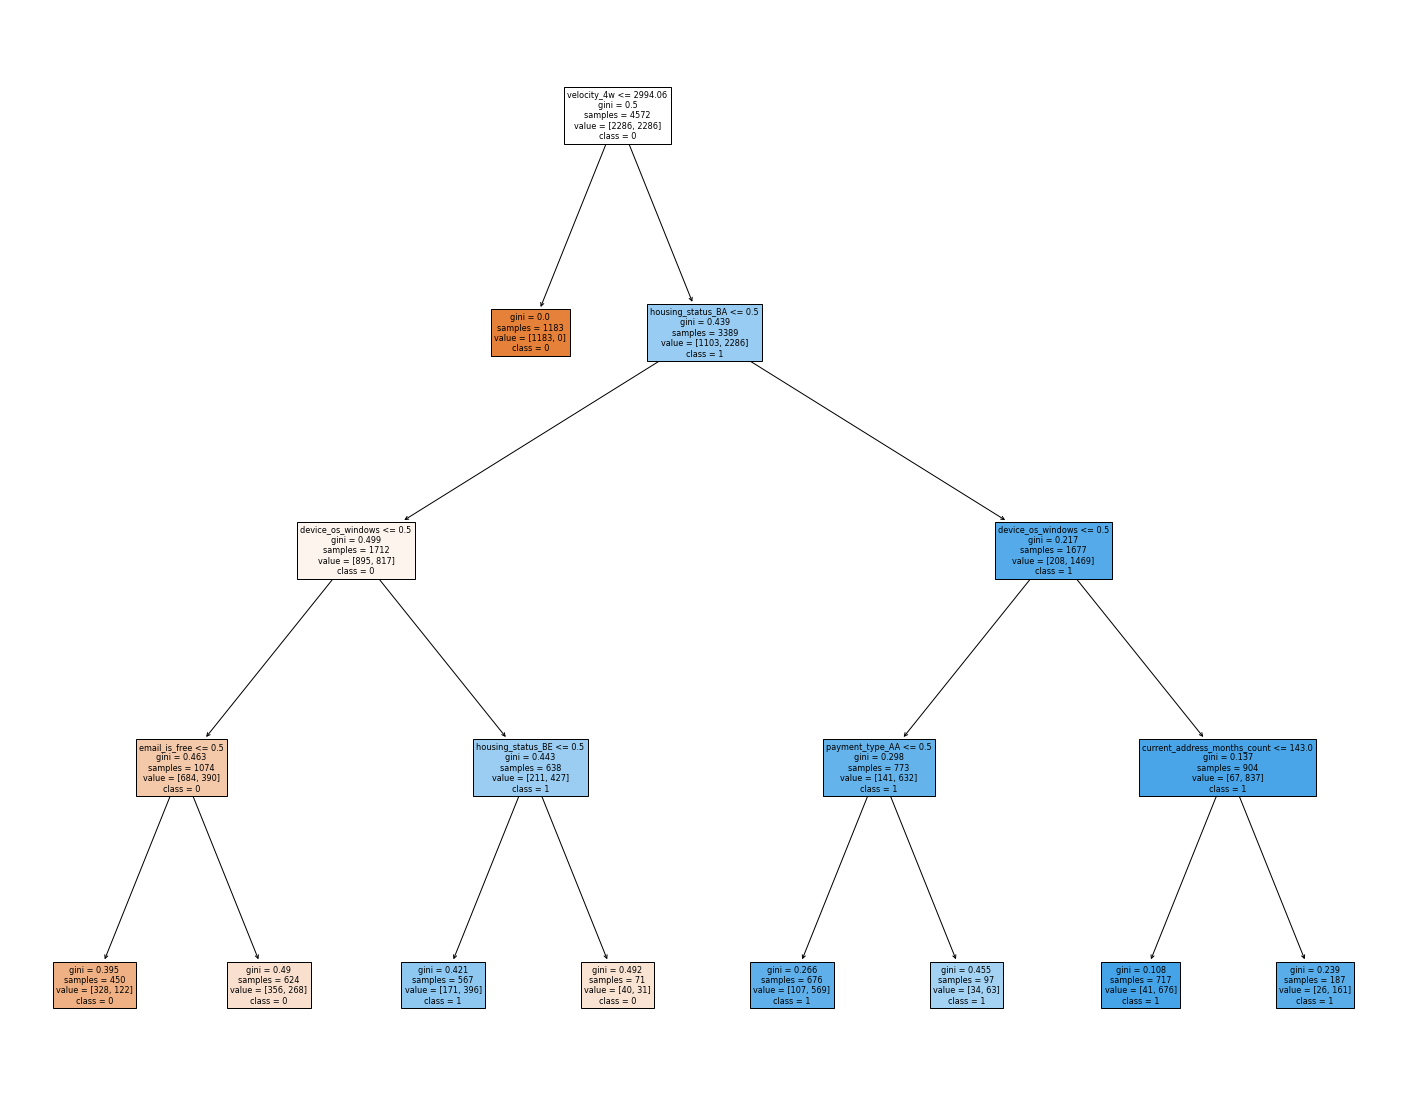

In [14]:
tree_graph(clf, X_train, y_train)

<AxesSubplot: xlabel='importance', ylabel='features'>

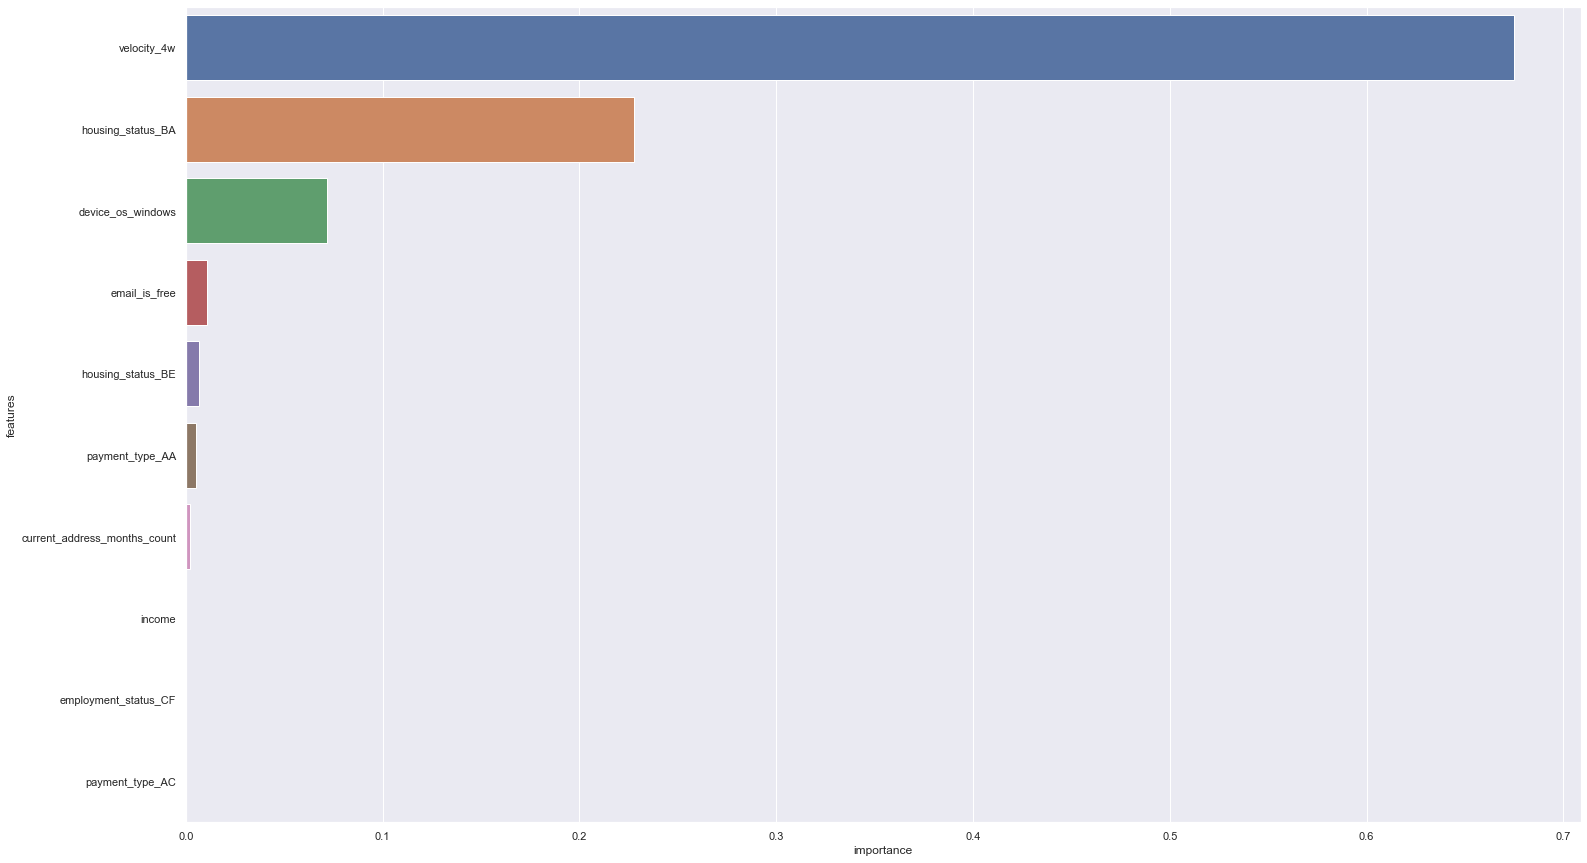

In [15]:
importance_graph(clf, X_train)
importances = pd.DataFrame({'features': X_train.columns, 'importance': np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.sort_values('importance', ascending=False)
import seaborn as sns
sns.set(rc={'figure.figsize':(25,15)})
sns.barplot(x='importance', y = 'features', data = importances[:10])

In [16]:
dt_performance = pd.DataFrame()
dt_performance=dt_performance.append([ori_perf,fe_perf,tune_perf,gs_perf,le_perf_out,dt_test_perf]).reset_index()
dt_performance

index    acc  cv_score  train_roc  test_roc  recall_score  f1_score  \
0       0  0.730     0.757      0.630     0.575         0.730     0.684   
1       0  0.759     0.825      0.841     0.786         0.759     0.770   
2       0  0.612     0.758      0.759     0.729         0.612     0.619   
3       0  0.612     0.758      0.759     0.729         0.612     0.619   
4       0  0.612     0.758      0.759     0.729         0.612     0.619   
5       0  0.612     0.758      0.759     0.729         0.612     0.619   
6       0  0.612     0.758      0.759     0.729         0.612     0.619   
7       0  0.815     0.776      0.776     0.751         0.815     0.810   
8       0  0.759     0.825      0.841     0.786         0.759     0.770   
9       0  0.759     0.825      0.841     0.786         0.759     0.770   
10      0  0.759     0.825      0.841     0.786         0.759     0.770   
11      0  0.759     0.825      0.841     0.786         0.759     0.770   
12      0  0.815     0.776      0.776     0.751         0.815     0.810   
13      0  0.782     0.832      0.855     0.796         0.782     0.791   
14      0  0.782     0.832      0.855     0.796         0.782     0.791   
15      0  0.782     0.832      0.855     0.796         0.782     0.791   
16      0  0.782     0.832      0.855     0.796         0.782     0.791   
17      0  0.815     0.776      0.776     0.751         0.815     0.810   
18      0  0.781     0.838      0.871     0.794         0.781     0.790   
19      0  0.782     0.841      0.871     0.798         0.782     0.792   
20      0  0.782     0.841      0.871     0.798         0.782     0.792   
21      0  0.782     0.841      0.871     0.798         0.782     0.792   
22      0  0.815     0.776      0.776     0.751         0.815     0.810   
23      0  0.761     0.845      0.885     0.784         0.761     0.772   
24      0  0.764     0.852      0.885     0.789         0.764     0.774   
25      0  0.764     0.852      0.885     0.789         0.764     0.774   
26      0  0.764     0.852      0.885     0.789         0.764     0.774   
27      0  0.802     0.821      0.825     0.800         0.802     0.809   
28      0  0.771     0.745      0.757     0.750         0.771     0.777   
29      0  0.802     0.792      0.798     0.799         0.802     0.809   
30      0  0.890     0.893      0.895     0.865         0.890     0.890   
31      0  0.948     0.945      0.953     0.946         0.948     0.948   
32      0  0.959     0.980      0.983     0.970         0.959     0.959   
33      0  0.868     0.939      0.947     0.899         0.868     0.873   
34      0  0.805     0.894      0.903     0.860         0.805     0.814   
35      0  0.832     0.854      0.861     0.824         0.832     0.837   
36      0  0.798     0.836      0.846     0.803         0.798     0.805   
37      0  0.790     0.825      0.827     0.794         0.790     0.798   
38      0  0.815     0.821      0.825     0.813         0.815     0.821   

    run_time  max_leaf_nodes  max_depth                    name train_ratio  
0    0.01562              10         10             dt_Ori_data         NaN  
1    0.00000              10         10  dt_Feature_engineering         NaN  
2    0.01562               2          2                 dt_tune         NaN  
3    0.00000               2         10                 dt_tune         NaN  
4    0.00000               2         20                 dt_tune         NaN  
5    0.00000               2         35                 dt_tune         NaN  
6    0.00000               2         50                 dt_tune         NaN  
7    0.00000              10          2                 dt_tune         NaN  
8    0.01562              10         10                 dt_tune         NaN  
9    0.01562              10         20                 dt_tune         NaN  
10   0.00000              10         35                 dt_tune         NaN  
11   0.00000              10         50                 dt_tune    

In [17]:
dt_performance.to_excel('./performance/dt_perf_data1.xlsx',index=False)

# Data set 2

In [18]:
# load data
df = load_data('customer_segment.csv')
df.drop(columns= ['ID'],inplace=True)
# transform target variable
from sklearn.preprocessing import LabelEncoder
df.Segmentation=LabelEncoder().fit_transform(df.Segmentation)

In [19]:
## model2.1 - Decision tree with original data

In [20]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# drop catcols
X_train, X_valid, X_test = drop_catcols(X_train, X_valid, X_test)
X_train, X_valid, X_test = X_train.fillna(0), X_valid.fillna(0), X_test.fillna(0)
# model
params = {'max_leaf_nodes': 10,
             'max_depth': 10,
         }
clf = tree.DecisionTreeClassifier(random_state = 0, max_leaf_nodes=params['max_leaf_nodes'], max_depth=params['max_depth'],)
ori_perf = model2(clf, X_train, y_train, X_valid, y_valid)
ori_perf['max_leaf_nodes'] = params['max_leaf_nodes']
ori_perf['max_depth'] = params['max_depth']
ori_perf['name'] = 'dt_Ori_data'
ori_perf

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.478     0.435      0.717     0.732         0.478     0.418       0.0   

   max_leaf_nodes  max_depth         name  
0              10         10  dt_Ori_data

In [21]:
## model2.2 - Decision tree with feature engineering

In [22]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)

# model
params = {'max_leaf_nodes': 10,
             'max_depth': 10
            }
clf = tree.DecisionTreeClassifier(random_state = 0,max_leaf_nodes=params['max_leaf_nodes'], max_depth=params['max_depth'])
fe_perf = model2(clf, X_train, y_train, X_valid, y_valid)
fe_perf['max_leaf_nodes'] = params['max_leaf_nodes']
fe_perf['max_depth'] = params['max_depth']
fe_perf['name'] = 'dt_Feature_engineering'
fe_perf

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.496     0.484       0.75     0.745         0.496     0.475       0.0   

   max_leaf_nodes  max_depth                    name  
0              10         10  dt_Feature_engineering

In [23]:
## model2.3 - Decision tree tune pruning

In [24]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)

# model
params = {'max_leaf_nodes': [2,10,20,35,50],
             'max_depth': [2,10,20,35,50]}
tune_perf = pd.DataFrame()
for x in [0,1,2,3,4]:
    for y in [0,1,2,3,4]:
        clf = tree.DecisionTreeClassifier(random_state = 0, max_leaf_nodes=params['max_leaf_nodes'][x], max_depth=params['max_depth'][y])
        fe_perf_loop = model2(clf, X_train, y_train, X_valid, y_valid)
        fe_perf_loop['max_leaf_nodes'] = params['max_leaf_nodes'][x]
        fe_perf_loop['max_depth'] = params['max_depth'][y]
        tune_perf = tune_perf.append(fe_perf_loop)
tune_perf['name'] = 'dt_tune'
tune_perf

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.351     0.358      0.602     0.597         0.351     0.257     0.000   
0  0.351     0.358      0.602     0.597         0.351     0.257     0.000   
0  0.351     0.358      0.602     0.597         0.351     0.257     0.000   
0  0.351     0.358      0.602     0.597         0.351     0.257     0.000   
0  0.351     0.358      0.602     0.597         0.351     0.257     0.000   
0  0.455     0.437      0.688     0.686         0.455     0.400     0.000   
0  0.496     0.484      0.750     0.745         0.496     0.475     0.016   
0  0.496     0.484      0.750     0.745         0.496     0.475     0.000   
0  0.496     0.484      0.750     0.745         0.496     0.475     0.016   
0  0.496     0.484      0.750     0.745         0.496     0.475     0.016   
0  0.455     0.437      0.688     0.686         0.455     0.400     0.000   
0  0.480     0.494      0.770     0.738         0.480     0.474     0.000   
0  0.480     0.494      0.770     0.738         0.480     0.474     0.016   
0  0.480     0.494      0.770     0.738         0.480     0.474     0.000   
0  0.480     0.494      0.770     0.738         0.480     0.474     0.000   
0  0.455     0.437      0.688     0.686         0.455     0.400     0.000   
0  0.488     0.488      0.784     0.734         0.488     0.469     0.000   
0  0.488     0.488      0.784     0.734         0.488     0.469     0.000   
0  0.488     0.488      0.784     0.734         0.488     0.469     0.016   
0  0.488     0.488      0.784     0.734         0.488     0.469     0.000   
0  0.455     0.437      0.688     0.686         0.455     0.400     0.000   
0  0.489     0.481      0.793     0.732         0.489     0.470     0.000   
0  0.489     0.482      0.793     0.731         0.489     0.470     0.016   
0  0.489     0.482      0.793     0.731         0.489     0.470     0.016   
0  0.489     0.482      0.793     0.731         0.489     0.470     0.016   

   max_leaf_nodes  max_depth     name  
0               2          2  dt_tune  
0               2         10  dt_tune  
0               2         20  dt_tune  
0               2         35  dt_tune  
0               2         50  dt_tune  
0              10          2  dt_tune  
0              10         10  dt_tune  
0              10         20  dt_tune  
0              10         35  dt_tune  
0              10         50  dt_tune  
0              20          2  dt_tune  
0              20         10  dt_tune  
0              20         20  dt_tune  
0              20         35  dt_tune  
0              20         50  dt_tune  
0              35          2  dt_tune  
0              35         10  dt_tune  
0              35         20  dt_tune  
0              35         35  dt_tune  
0              35         50  dt_tune  
0              50          2  dt_tune  
0              50         10  dt_tune  
0              50         20  dt_tune  
0              50         35  dt_tune  
0              50         50  dt_tune

In [25]:
## model2.4 - Decision tree Grid Search

In [26]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)

# model
t_start = process_time()
parameters = {'max_depth':range(2,20,2),'max_leaf_nodes': range(2,20,2)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=-1, cv=3)
clf.fit(X=X_train, y=y_train)
t_stop = process_time()
print (clf.best_score_, clf.best_params_, 'time spend: ', round(t_stop - t_start, 3))
md = clf.best_params_['max_depth']
mln = clf.best_params_['max_leaf_nodes']

0.48280966372492645 {'max_depth': 6, 'max_leaf_nodes': 16} time spend:  0.125


In [27]:
clf = tree.DecisionTreeClassifier(max_depth = md, max_leaf_nodes = mln)
gs_perf = model2(clf, X_train, y_train, X_valid, y_valid)
gs_perf['name'] = 'dt_grid_search'
gs_perf['max_leaf_nodes'] = mln
gs_perf['max_depth'] = md
gs_perf

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.486     0.498      0.765     0.741         0.486     0.484       0.0   

             name  max_leaf_nodes  max_depth  
0  dt_grid_search              16          6

In [28]:
## model2.5 - Decision tree learning curve

In [29]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# create an empty df for output
le_perf_out = pd.DataFrame()
for r in [0.1, 0.2,0.3, 0.4, 0.5,0.6, 0.7,0.8,0.9,1.0]:
    # frac train set to build model
#     print(len(X_train))
    X_trainf = X_train.sample(frac = r, random_state=0)
    y_trainf = y_train.loc[X_trainf.index]
    
#     print(len(X_trainf), len(y_trainf))
    # feature engineering
    X_trainf, X_valid, X_test = ohe(X_trainf, X_valid, X_test)
    # model
    params = {'max_leaf_nodes': mln,
                 'max_depth': md}

    clf = tree.DecisionTreeClassifier(random_state = 0, max_leaf_nodes=params['max_leaf_nodes'], max_depth=params['max_depth'])
    le_perf = model2(clf, X_trainf, y_trainf, X_valid, y_valid)
    # add columns
    le_perf['train_ratio'] = str(r)
    le_perf['max_leaf_nodes'] = mln
    le_perf['max_depth'] = md
    le_perf['name'] = 'dt_train_size'
    le_perf_out = le_perf_out.append(le_perf)
    
le_perf_out

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.456     0.425      0.802     0.716         0.456     0.462     0.000   
0  0.491     0.448      0.779     0.721         0.491     0.491     0.016   
0  0.471     0.466      0.773     0.729         0.471     0.477     0.000   
0  0.481     0.476      0.770     0.731         0.481     0.443     0.000   
0  0.478     0.468      0.760     0.732         0.478     0.435     0.000   
0  0.472     0.468      0.763     0.731         0.472     0.425     0.000   
0  0.478     0.478      0.763     0.739         0.478     0.445     0.000   
0  0.485     0.487      0.765     0.739         0.485     0.471     0.000   
0  0.495     0.478      0.763     0.745         0.495     0.478     0.000   
0  0.501     0.497      0.766     0.747         0.501     0.500     0.000   

  train_ratio  max_leaf_nodes  max_depth           name  
0         0.1              16          6  dt_train_size  
0         0.2              16          6  dt_train_size  
0         0.3              16          6  dt_train_size  
0         0.4              16          6  dt_train_size  
0         0.5              16          6  dt_train_size  
0         0.6              16          6  dt_train_size  
0         0.7              16          6  dt_train_size  
0         0.8              16          6  dt_train_size  
0         0.9              16          6  dt_train_size  
0         1.0              16          6  dt_train_size

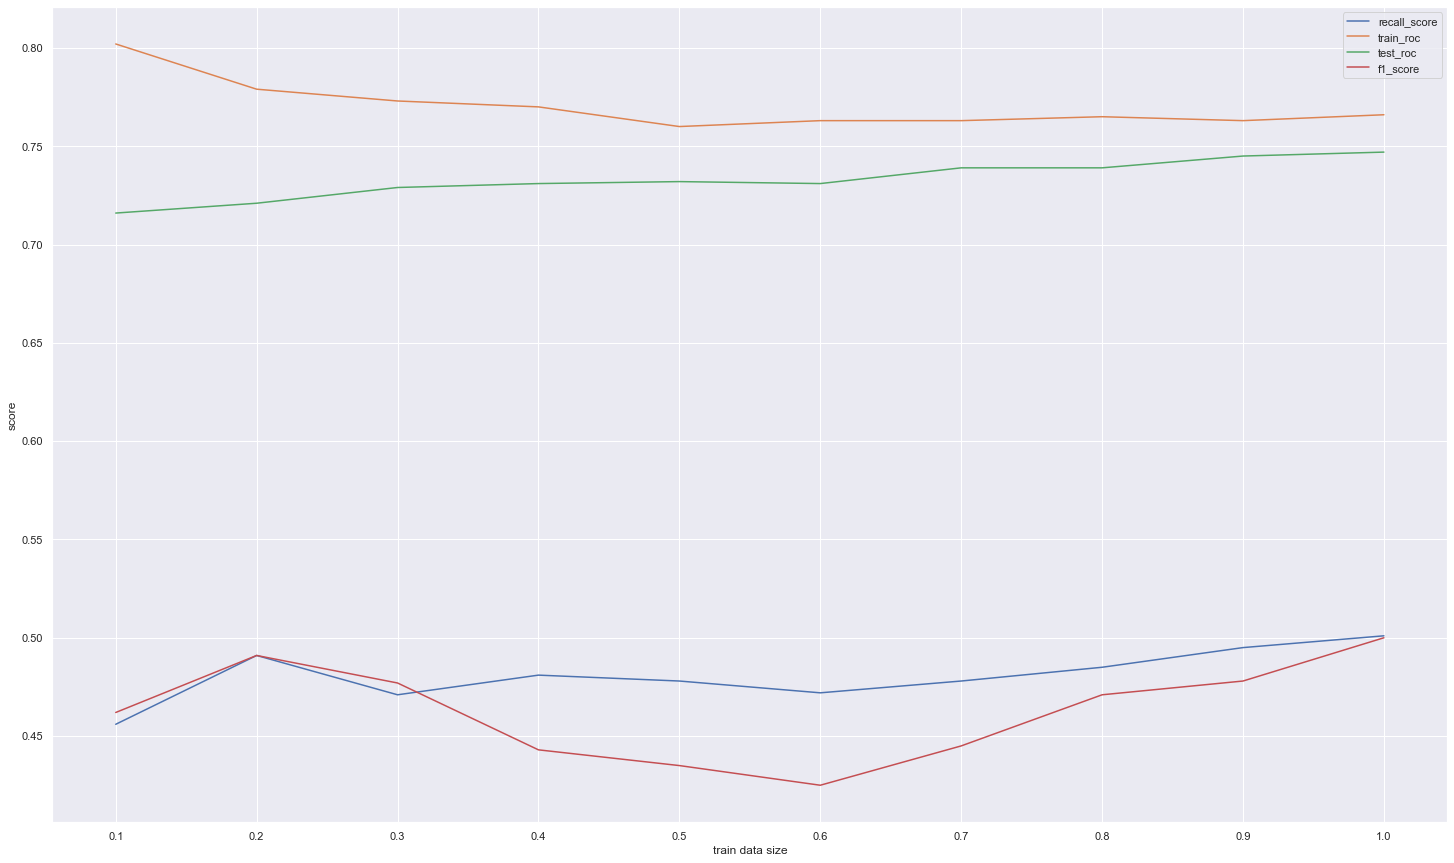

In [30]:
learning_curve_graph(le_perf_out)

In [31]:
# Decision Tree 2 test set output

In [32]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model
clf = tree.DecisionTreeClassifier(random_state = 0,max_leaf_nodes=mln, max_depth=md)
dt_test_perf = model2(clf, X_train, y_train, X_test, y_test)
dt_test_perf['max_leaf_nodes'] = mln
dt_test_perf['max_depth'] = md
dt_test_perf['name'] = 'dt_test'
dt_test_perf

acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.479     0.498      0.765     0.745         0.479     0.481       0.0   

   max_leaf_nodes  max_depth     name  
0              16          6  dt_test

In [33]:
# Decision tree model 2 summary

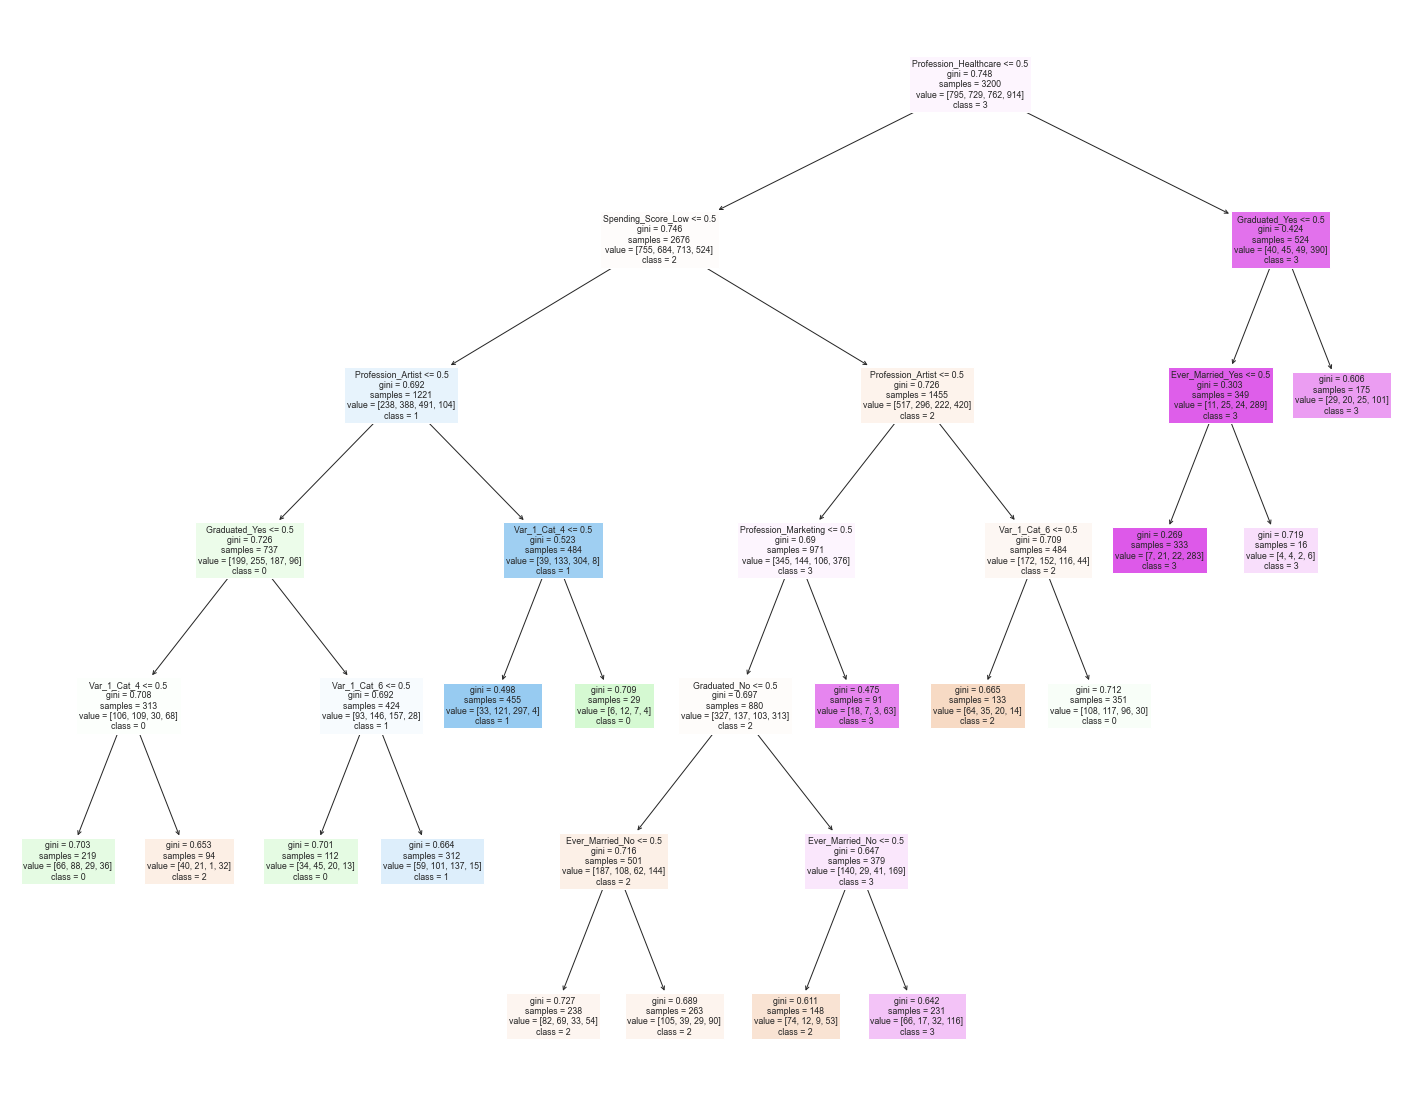

In [34]:
tree_graph(clf, X_train, y_train)

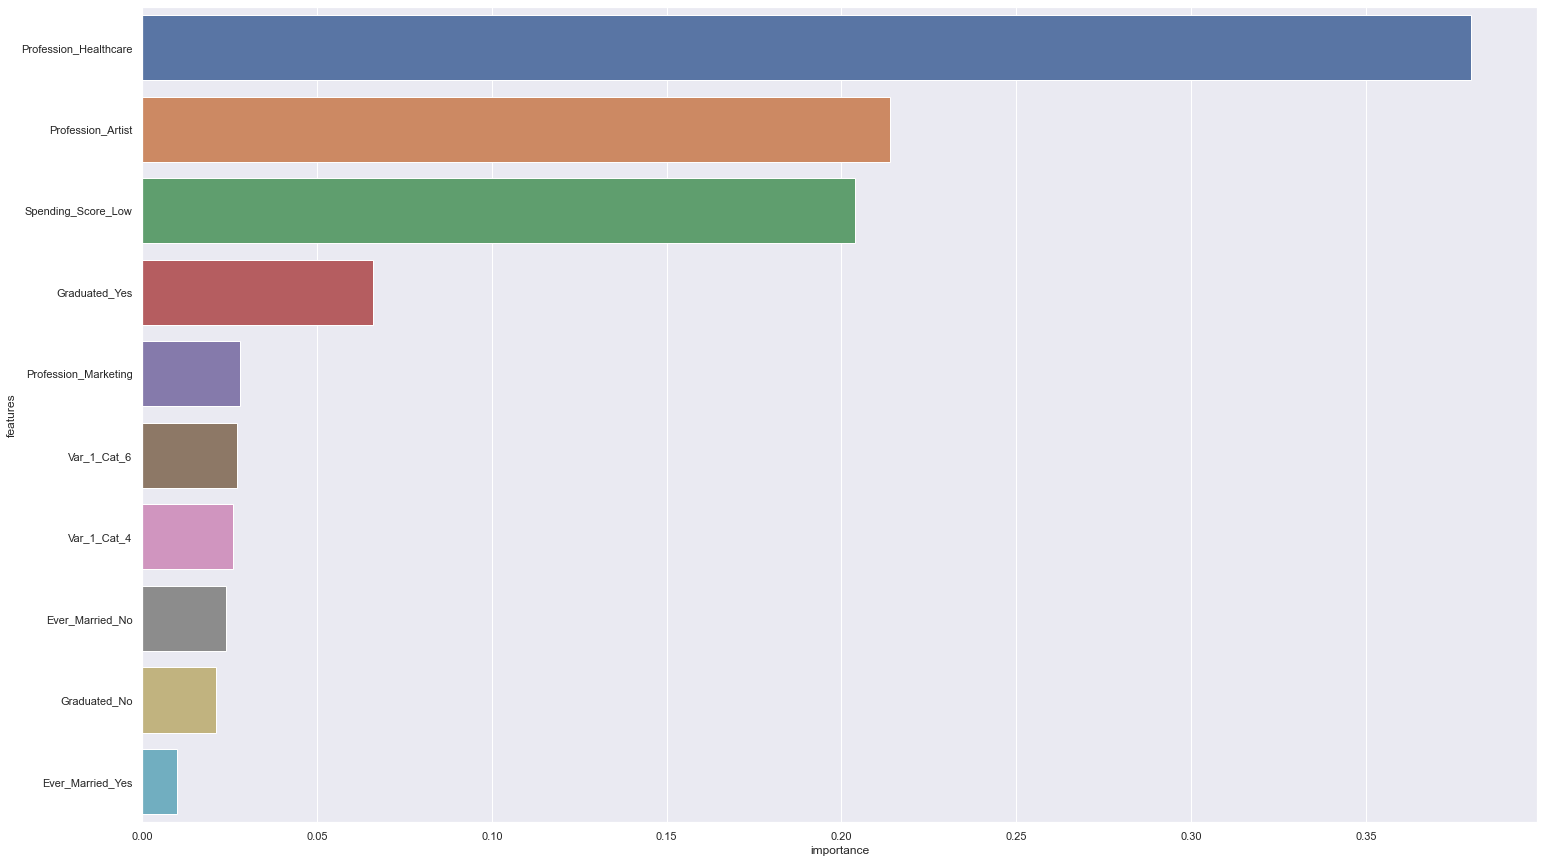

In [35]:
importance_graph(clf, X_train)

In [36]:
dt_performance = pd.DataFrame()
dt_performance=dt_performance.append([ori_perf,fe_perf,tune_perf,gs_perf,le_perf_out,dt_test_perf]).reset_index()
dt_performance

index    acc  cv_score  train_roc  test_roc  recall_score  f1_score  \
0       0  0.478     0.435      0.717     0.732         0.478     0.418   
1       0  0.496     0.484      0.750     0.745         0.496     0.475   
2       0  0.351     0.358      0.602     0.597         0.351     0.257   
3       0  0.351     0.358      0.602     0.597         0.351     0.257   
4       0  0.351     0.358      0.602     0.597         0.351     0.257   
5       0  0.351     0.358      0.602     0.597         0.351     0.257   
6       0  0.351     0.358      0.602     0.597         0.351     0.257   
7       0  0.455     0.437      0.688     0.686         0.455     0.400   
8       0  0.496     0.484      0.750     0.745         0.496     0.475   
9       0  0.496     0.484      0.750     0.745         0.496     0.475   
10      0  0.496     0.484      0.750     0.745         0.496     0.475   
11      0  0.496     0.484      0.750     0.745         0.496     0.475   
12      0  0.455     0.437      0.688     0.686         0.455     0.400   
13      0  0.480     0.494      0.770     0.738         0.480     0.474   
14      0  0.480     0.494      0.770     0.738         0.480     0.474   
15      0  0.480     0.494      0.770     0.738         0.480     0.474   
16      0  0.480     0.494      0.770     0.738         0.480     0.474   
17      0  0.455     0.437      0.688     0.686         0.455     0.400   
18      0  0.488     0.488      0.784     0.734         0.488     0.469   
19      0  0.488     0.488      0.784     0.734         0.488     0.469   
20      0  0.488     0.488      0.784     0.734         0.488     0.469   
21      0  0.488     0.488      0.784     0.734         0.488     0.469   
22      0  0.455     0.437      0.688     0.686         0.455     0.400   
23      0  0.489     0.481      0.793     0.732         0.489     0.470   
24      0  0.489     0.482      0.793     0.731         0.489     0.470   
25      0  0.489     0.482      0.793     0.731         0.489     0.470   
26      0  0.489     0.482      0.793     0.731         0.489     0.470   
27      0  0.486     0.498      0.765     0.741         0.486     0.484   
28      0  0.456     0.425      0.802     0.716         0.456     0.462   
29      0  0.491     0.448      0.779     0.721         0.491     0.491   
30      0  0.471     0.466      0.773     0.729         0.471     0.477   
31      0  0.481     0.476      0.770     0.731         0.481     0.443   
32      0  0.478     0.468      0.760     0.732         0.478     0.435   
33      0  0.472     0.468      0.763     0.731         0.472     0.425   
34      0  0.478     0.478      0.763     0.739         0.478     0.445   
35      0  0.485     0.487      0.765     0.739         0.485     0.471   
36      0  0.495     0.478      0.763     0.745         0.495     0.478   
37      0  0.501     0.497      0.766     0.747         0.501     0.500   
38      0  0.479     0.498      0.765     0.745         0.479     0.481   

    run_time  max_leaf_nodes  max_depth                    name train_ratio  
0      0.000              10         10             dt_Ori_data         NaN  
1      0.000              10         10  dt_Feature_engineering         NaN  
2      0.000               2          2                 dt_tune         NaN  
3      0.000               2         10                 dt_tune         NaN  
4      0.000               2         20                 dt_tune         NaN  
5      0.000               2         35                 dt_tune         NaN  
6      0.000               2         50                 dt_tune         NaN  
7      0.000              10          2                 dt_tune         NaN  
8      0.016              10         10                 dt_tune         NaN  
9      0.000              10         20                 dt_tune         NaN  
10     0.016              10         35                 dt_tune         NaN  
11     0.016              10         50                 dt_tune    

In [37]:
dt_performance.to_excel('./performance/dt_perf_data2.xlsx',index=False)